# 相愛容易相處難
## 動機
###  每9.9分鐘就有人離婚！？
[https://health.tvbs.com.tw/life/351454](https://health.tvbs.com.tw/life/351454)

在分析 PTT 離婚版的討論內容時，發現許多離婚案例的動機各有不同。根據 TVBS 健康網的報導，夫妻間的關係問題是導致離婚的主要原因，包括家務分工不均、經濟問題、子女教養方式的差異，以及與上一代相處的問題。

此外，心理學家約翰·戈特曼的研究指出，夫妻間若出現批評、污辱等不良互動模式，且未及時察覺並改善，婚姻關係可能會以離婚收場。

在 PTT 離婚版的討論中，也有網友提到，夫妻間缺乏溝通，生活缺乏分享與交流，導致感情逐漸疏離，最終走向離婚。 

因此，離婚的動機可能源自多方面因素，包括夫妻間的溝通不良、價值觀差異、生活壓力等。這些因素的累積，可能最終導致婚姻關係的破裂。


# 流程
## 爬資料  -> 清洗資料 ->  分析資料

# 資料介紹
資料來源：
+ TarFlow 蒐集PTT 婚姻版的文章
+ 關鍵字：「離婚」
+ 時間： 2021-01-09 ~ 2024-12-31
+ 資料筆數：共 2204 篇文章

# 套件

In [35]:
import pandas as pd
import jieba
import jieba.analyse
import re
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib.font_manager import fontManager

# 設定字型
fontManager.addfont('font/TaipeiSansTCBeta-Regular.ttf')
FontPath = 'font/TaipeiSansTCBeta-Regular.ttf'

# 設定字型與大小
plt.rcParams['font.size'] = 12
matplotlib.rc('font', family='Taipei Sans TC Beta')

# 列出所有可用字型名稱
a = sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
for i in a:
    print(i)

Agency FB
Agency FB
Algerian
Arial
Arial
Arial
Arial
Arial
Arial
Arial
Arial
Arial
Arial Rounded MT Bold
Bahnschrift
Baskerville Old Face
Bauhaus 93
Bell MT
Bell MT
Bell MT
Berlin Sans FB
Berlin Sans FB
Berlin Sans FB Demi
Bernard MT Condensed
Blackadder ITC
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Book Antiqua
Book Antiqua
Book Antiqua
Book Antiqua
Bookman Old Style
Bookman Old Style
Bookman Old Style
Bookman Old Style
Bookshelf Symbol 7
Bradley Hand ITC
Britannic Bold
Broadway
Brush Script MT
Calibri
Calibri
Calibri
Calibri
Calibri
Calibri
Californian FB
Californian FB
Californian FB
Calisto MT
Calisto MT
Calisto MT
Calisto MT
Cambria
Cambria
Cambria
Cambria
Candara
Candara
Candara
Candara
Candara
Candara
Cascadia Code
Cascadia Mono
Castellar
Centaur
Century
Century Gothic
Century Gothic
Century Gothic
Century Gothic
Century Schoolbook
Century Schoolbook
Century Schoolbook
Century Schoolbook
Chiller
Colonna MT
Comic

In [30]:
df = pd.read_csv('text.csv')
df.head(3)

system_id                                             artUrl  \
0          1  https://www.ptt.cc/bbs/marriage/M.1610159827.A...   
1          2  https://www.ptt.cc/bbs/marriage/M.1610162736.A...   
2          3  https://www.ptt.cc/bbs/marriage/M.1610190309.A...   

             artTitle              artDate artPoster artCatagory  \
0     [求助]真的可以不給看手機嗎？  2021-01-09 10:37:05  safelove    marriage   
1          Re:老公工作不穩定  2021-01-09 11:25:34     mayko    marriage   
2  Re:[求助]真的可以不給看手機嗎？  2021-01-09 19:05:00    loser1    marriage   

                                          artContent  \
0  常常看大家說，偷看手機是不對的，\n但如果已經結婚了，太太想看你手機，\n真的可以拒絕嗎？\...   
1  因為男方工作不穩定,房東才不肯租,只好換女生承租,對吧\n很殘忍的說...這無緣的孩子聰明,...   
2  手機要看就給看啊！\n先帝爺不是說，\n一隻不夠，不能辦兩隻嗎？\n兩隻不夠，不能辦三隻嗎？...   

                                          artComment             e_ip  \
0  [{"cmtStatus": "推", "cmtPoster": "FlyOncidium"...  114.137.169.105   
1                                                 []    36.229.84.229   
2  [{"cmtStatus": "噓", "cmtPoster": "mark0204", "...  118.170.238.138   

          insertedDate dataSource  
0  2021-01-10 01:20:56        ptt  
1  2021-01-10 01:20:56        ptt  
2  2021-01-10 01:20:56        ptt

# 資料初步清理

In [31]:
clear_df = df.copy()

In [ ]:
#去除本次不會用到的欄位
drop_cols = ['system_id', 'artPoster', 'artCatagory', 'artComment', 'e_ip', 'insertedDate', 'dataSource']
clear_df.drop(drop_cols, axis = 1, inplace = True)

#去除文章內容為空值的筆數
clear_df.dropna(subset = ['artContent'], axis=0, how='any', inplace=True)

#新增['sentence']欄位，用'。'取代'\n\n'，並移除'\n'
clear_df['sentence'] = clear_df['artContent'].str.replace(r'\n\n','。', regex=True)
clear_df['sentence'] = clear_df['sentence'].str.replace(r'\n','，', regex=True)

#移除內文中的網址
clear_df['sentence'] = clear_df['sentence'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

#清除日期欄位的時間
clear_df["artDate"] = pd.to_datetime(clear_df["artDate"])
clear_df['artDate'] = clear_df['artDate'].dt.date
clear_df

## 斷句

In [33]:
clear_df['sentence'] = clear_df['sentence'].str.split("[,，。！!？?]{1,}")
sent_df = clear_df.explode('sentence').reset_index(drop=True)


## 斷詞

In [ ]:
jieba.set_dictionary('dict/dict.txt')

#去除句子中除了字母、數字、空白字符以外的符號
sent_df['sentence'] = sent_df['sentence'].str.replace(r'[^\w\s]+', '', regex=True).astype(str)

# 把長度小於1的sentence刪掉
sent_df = sent_df[sent_df["sentence"].str.len() > 1]
word_df = sent_df.assign(word = sent_df['sentence'].apply(jieba.lcut)).explode('word').drop(['sentence'], axis=1)

#去除少於兩個字的詞語
word_df = word_df.loc[word_df['word'].str.len() > 1]

## 去除停用詞

In [36]:
freq_df = pd.DataFrame(word_df['word'].value_counts()).sort_values(by = ['count'], ascending=False).reset_index()
freq_df.head(10)

word  count
0   自己   6167
1   小孩   5191
2   就是   3884
3   可以   3876
4   離婚   3398
5   老婆   3371
6   因為   3114
7   如果   3099
8   老公   3010
9   不是   2912

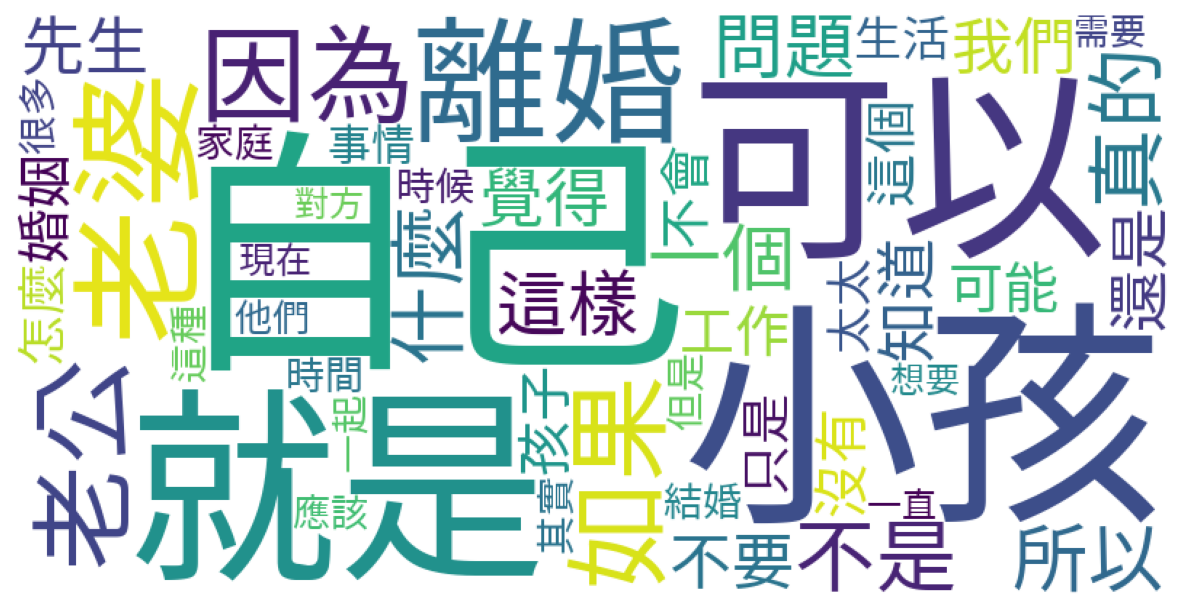

In [37]:
freq_dict = freq_df.set_index('word').to_dict()
freq_dict = freq_dict['count']

# 繪製文字雲
wordcloud_no1 = WordCloud(background_color = 'white', width = 800, height = 400, font_path = FontPath, max_words = 50)
wordcloud_no1.generate_from_frequencies(freq_dict)

plt.figure(figsize = (10,7))
plt.imshow(wordcloud_no1)
plt.axis('off')
plt.show()

# 繪製文字雲

  word  count
0   問題   2354
1   工作   1827
2   生活   1465
3   時間   1353
4   家庭   1332
{'問題': 2354, '工作': 1827, '生活': 1465, '時間': 1353, '家庭': 1332, '希望': 951, '建議': 915, '溝通': 752, '情緒': 706, '接受': 679, '照顧': 650, '選擇': 605, '要求': 592, '吵架': 580, '改變': 575, '處理': 556, '人生': 553, '想法': 539, '重要': 516, '解決': 511, '努力': 500, '討論': 499, '相處': 480, '幫忙': 478, '能力': 474, '家人': 473, '決定': 470, '壓力': 463, '同意': 452, '上班': 443, '經濟': 422, '家事': 404, '願意': 390, '付出': 385, '相信': 380, '清楚': 375, '抱怨': 370, '原因': 368, '感受': 363, '理解': 357, '開心': 355, '收入': 350, '心理': 345, '正常': 343, '外遇': 340, '心情': 339, '尊重': 337, '薪水': 336, '發生': 333, '好像': 333, '那種': 332, '反正': 329, '生小孩': 322, '今天': 322, '變成': 321, '兩人': 321, '未來': 321, '本來': 320, '簡單': 317, '影響': 317, '我會': 315, '辛苦': 314, '痛苦': 311, '想到': 309, '公司': 307, '理由': 306, '身上': 305, '準備': 302, '思考': 301, '機會': 298, '考慮': 290, '謝謝': 289, '找到': 284, '方法': 284, '行為': 283, '一堆': 281, '很大': 280, '重點': 279, '擔心': 278, '得到': 278, '這段': 274, '分享': 273, '下班': 2

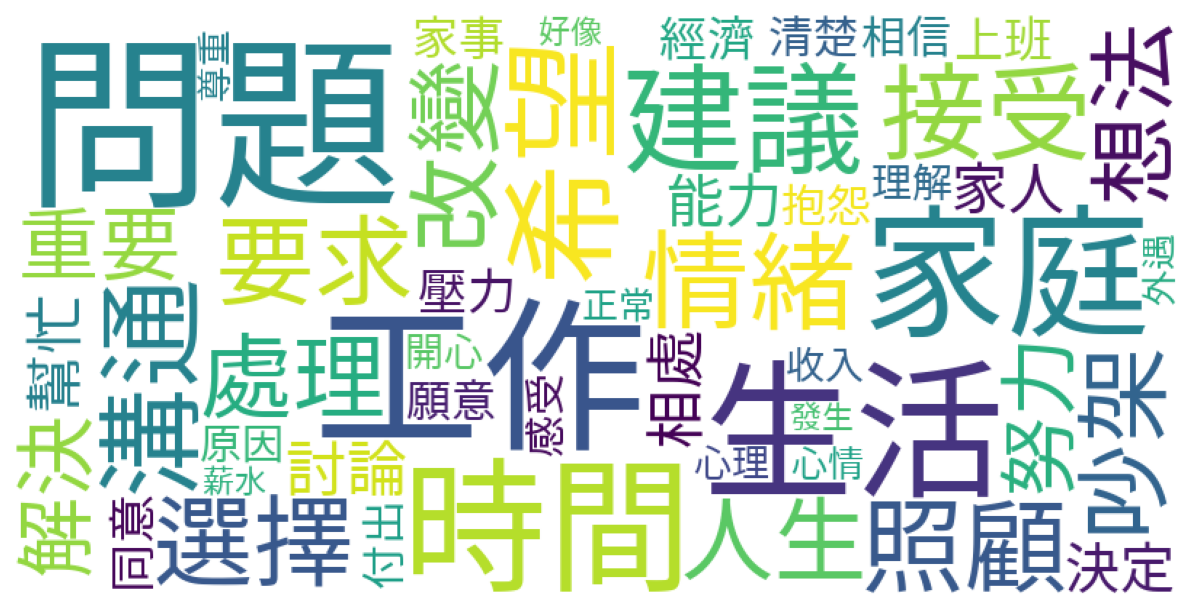

In [39]:
# 確保 noStop_df['word'] 是 Series，並計算詞頻
freq_df = pd.DataFrame(noStop_df['word'].value_counts()).reset_index()

# 重新命名欄位，確保詞語和次數正確
freq_df.columns = ['word', 'count']

# 依照 'count' 欄位排序（由高到低）
freq_df = freq_df.sort_values(by=['count'], ascending=False).reset_index(drop=True)

# 將 DataFrame 轉換成 dict（WordCloud 需要 dict 格式）
freq_dict = freq_df.set_index('word')['count'].to_dict()

# 輸出檢查
print(freq_df.head())  # 確保 DataFrame 正確
print(freq_dict)  # 確保 dict 正確

# 繪製文字雲
wordcloud = WordCloud(background_color = 'white', width = 800, height = 400, font_path = FontPath, max_words = 50)
wordcloud.generate_from_frequencies(freq_dict)
# wordcloud.to_file("wordcloud.png")  # 產生圖片

plt.figure(figsize = (10,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [ ]:
stops_word_m = ["好像","發生","幫忙","清楚","重要","上班","正常","今天","簡單","變成","反正","我會","想到","未來","本來"]
stopwords.extend(stops_word_m)
noStop_df_1 = noStop_df[~noStop_df['word'].isin(stopwords)]
noStop_df_1.head(10)

freq_df_nostop_1 = pd.DataFrame(noStop_df_1['word'].value_counts()).reset_index()
freq_df_nostop_1.columns = ['word', 'count']
freq_df_nostop_1 = freq_df_nostop_1.sort_values(by=['count'], ascending=False).reset_index(drop=True)
freq_df_nostop_1 = freq_df_nostop_1.set_index('word')['count'].to_dict()

print(freq_df.head(50))

# 繪製文字雲
wordcloud_nostop_1 = WordCloud(background_color = 'white', width = 800, height = 400, font_path = FontPath, max_words = 50)
wordcloud_nostop_1.generate_from_frequencies(freq_df_nostop_1)

plt.figure(figsize = (10,7))
plt.imshow(wordcloud_nostop_1)
plt.axis('off')
plt.show()

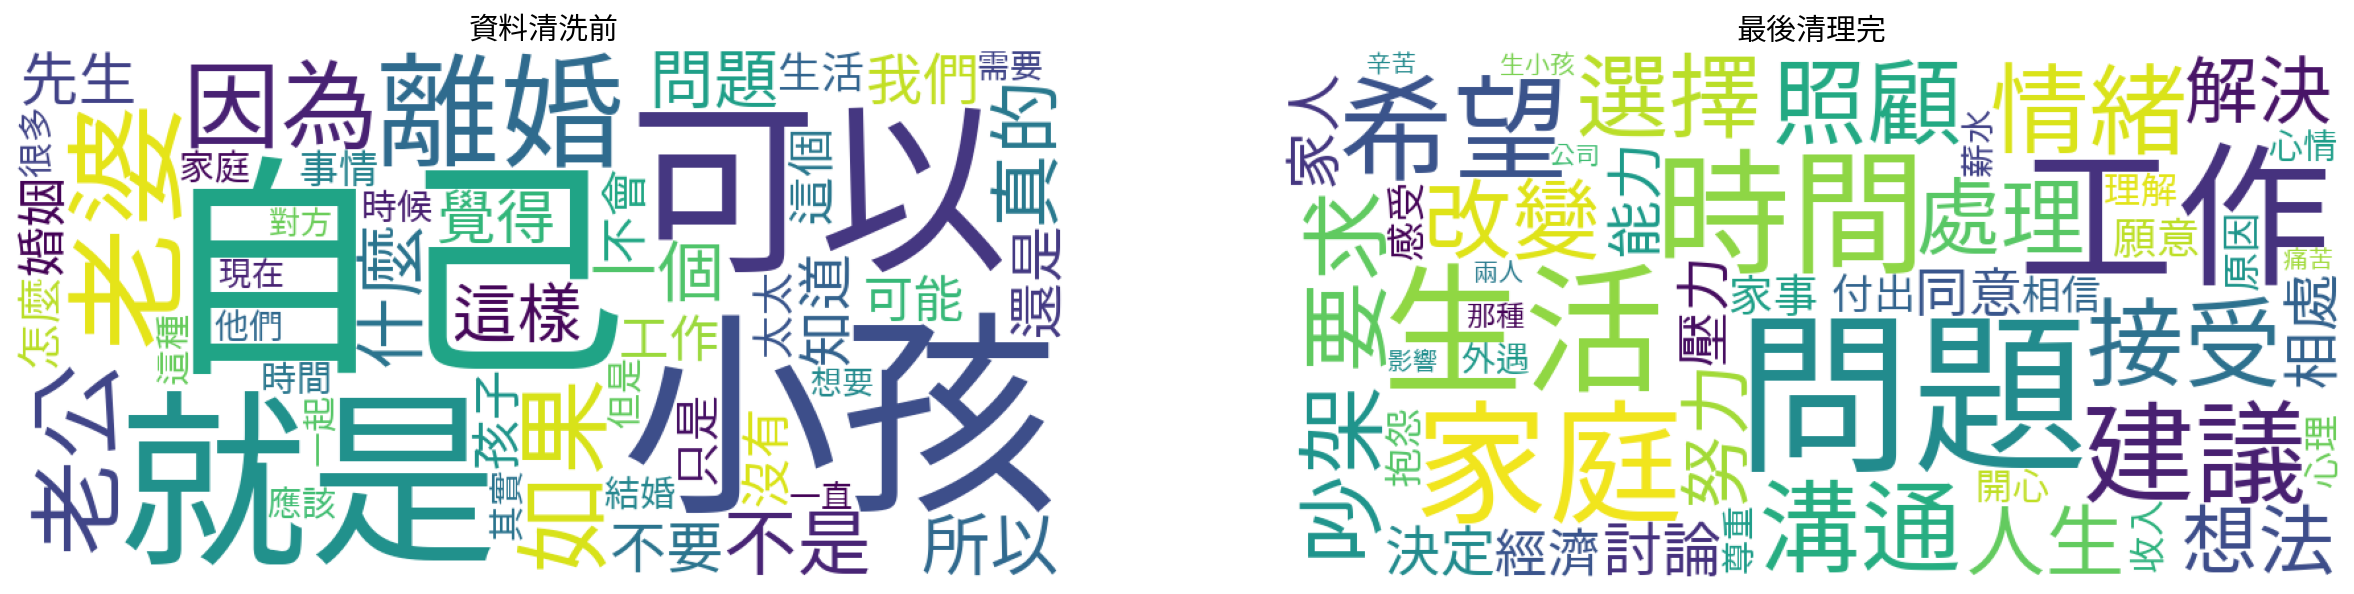

In [41]:
plt.figure(figsize = (20,14))

plt.subplot(1,2,1)
plt.imshow(wordcloud_no1)
plt.axis('off')
plt.title("資料清洗前")

plt.subplot(1,2,2)
plt.imshow(wordcloud_nostop_1)
plt.axis('off')
plt.title("最後清理完")

plt.show()

# 情緒分析

In [84]:
# 讀取情緒字典
liwc_dict = pd.read_csv("./dict/liwc/LIWC_CH.csv")
liwc_dict = liwc_dict.rename(columns={'name': 'word', "class": 'sentiments'})
liwc_dict.head()

word sentiments
0   ):     affect
1   3q     affect
2   :(     affect
3   :)     affect
4   <3     affect

In [85]:
liwc_dict['sentiments'].describe()

count       4682
unique         6
top       affect
freq        2061
Name: sentiments, dtype: object

In [86]:
ptt_liwc_df = pd.merge(noStop_df[["artUrl", "artDate", "artTitle", "artContent", "word"]], liwc_dict, how="left")
ptt_liwc_df.head()

artUrl     artDate  \
0  https://www.ptt.cc/bbs/marriage/M.1610159827.A...  2021-01-09   
1  https://www.ptt.cc/bbs/marriage/M.1610159827.A...  2021-01-09   
2  https://www.ptt.cc/bbs/marriage/M.1610159827.A...  2021-01-09   
3  https://www.ptt.cc/bbs/marriage/M.1610159827.A...  2021-01-09   
4  https://www.ptt.cc/bbs/marriage/M.1610159827.A...  2021-01-09   

          artTitle                                         artContent word  \
0  [求助]真的可以不給看手機嗎？  常常看大家說，偷看手機是不對的，\n但如果已經結婚了，太太想看你手機，\n真的可以拒絕嗎？\...   偷看   
1  [求助]真的可以不給看手機嗎？  常常看大家說，偷看手機是不對的，\n但如果已經結婚了，太太想看你手機，\n真的可以拒絕嗎？\...   手機   
2  [求助]真的可以不給看手機嗎？  常常看大家說，偷看手機是不對的，\n但如果已經結婚了，太太想看你手機，\n真的可以拒絕嗎？\...   手機   
3  [求助]真的可以不給看手機嗎？  常常看大家說，偷看手機是不對的，\n但如果已經結婚了，太太想看你手機，\n真的可以拒絕嗎？\...   拒絕   
4  [求助]真的可以不給看手機嗎？  常常看大家說，偷看手機是不對的，\n但如果已經結婚了，太太想看你手機，\n真的可以拒絕嗎？\...   拒絕   

  sentiments  
0        NaN  
1        NaN  
2        NaN  
3     affect  
4   negative

In [87]:
sentiment_count = pd.DataFrame(
    ptt_liwc_df.groupby(["artDate", "sentiments"]).size()
).reset_index()

mask = (sentiment_count['sentiments'] == "positive") | (sentiment_count['sentiments'] == "negative") 
sentiment_count = sentiment_count.loc[mask]

sentiment_count = sentiment_count.rename(columns={0: "size"})
sentiment_count = sentiment_count.sort_values(["artDate"])
sentiment_count.head(10)

artDate sentiments  size
3   2021-01-09   negative    36
4   2021-01-09   positive    35
9   2021-01-10   negative    78
10  2021-01-10   positive    49
13  2021-01-11   positive     1
16  2021-01-12   negative    12
17  2021-01-12   positive     9
21  2021-01-13   negative    21
22  2021-01-13   positive    22
25  2021-01-14   negative     1

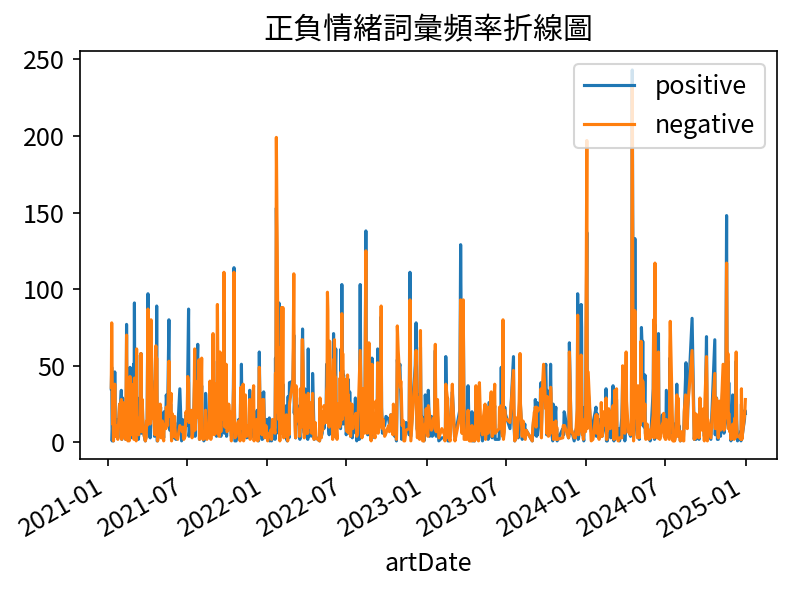

In [88]:
colors = ["tab:blue", "tab:orange"]
pos = sentiment_count[sentiment_count["sentiments"] == "positive"]
neg = sentiment_count[sentiment_count["sentiments"] == "negative"]

# fig, ax = plt.subplots(figsize = (6,4), dpi = 150) # 也可以在該圖設定參數
fig, ax = plt.subplots()

ax.plot(pos["artDate"], pos["size"], color=colors[0])
ax.plot(neg["artDate"], neg["size"], color=colors[1])

plt.xlabel("artDate")
# plt.ylabel('size')
ax.legend(["positive", "negative"], loc="upper right")
fig.autofmt_xdate()
plt.title("正負情緒詞彙頻率折線圖")  # 記得加上才能顯示中文
plt.show()
#負面情緒的詞彙變化幅度明顯比正向詞彙大，輿論、社會事件或新聞內容帶有較強的負面情緒。

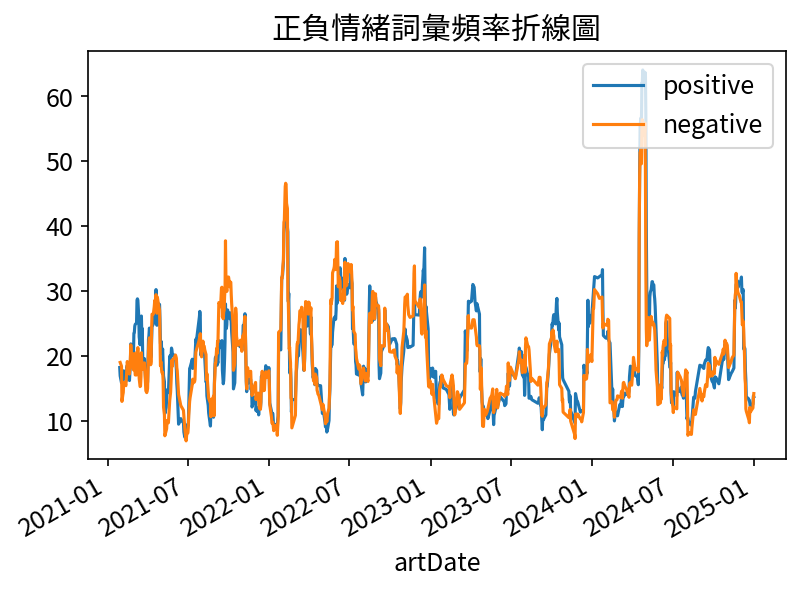

In [89]:
colors = ["tab:blue", "tab:orange"]
pos = sentiment_count[sentiment_count["sentiments"] == "positive"]
neg = sentiment_count[sentiment_count["sentiments"] == "negative"]

# fig, ax = plt.subplots(figsize = (6,4), dpi = 150) # 也可以在該圖設定參數
fig, ax = plt.subplots()

# 使用 Series.rolling().mean() 來產生 14 天平均
rolling_days = 14
ax.plot(pos["artDate"], pos['size'].rolling(rolling_days).mean(), color=colors[0])
ax.plot(neg["artDate"], neg["size"].rolling(rolling_days).mean(), color=colors[1])

plt.xlabel("artDate")
# plt.ylabel('size')
ax.legend(["positive", "negative"], loc="upper right")
fig.autofmt_xdate()
plt.title("正負情緒詞彙頻率折線圖")  # 記得加上才能顯示中文
plt.show()

In [90]:
sentiment_count = sentiment_count.assign(
    ratio=sentiment_count.groupby("artDate")["size"].transform(lambda n: n / n.sum())
)
sentiment_count.head(10)

artDate sentiments  size     ratio
3   2021-01-09   negative    36  0.507042
4   2021-01-09   positive    35  0.492958
9   2021-01-10   negative    78  0.614173
10  2021-01-10   positive    49  0.385827
13  2021-01-11   positive     1  1.000000
16  2021-01-12   negative    12  0.571429
17  2021-01-12   positive     9  0.428571
21  2021-01-13   negative    21  0.488372
22  2021-01-13   positive    22  0.511628
25  2021-01-14   negative     1  0.500000

In [91]:
pos = sentiment_count[sentiment_count["sentiments"] == "positive"]
neg = sentiment_count[sentiment_count["sentiments"] == "negative"]

Text(0.5, 1.0, '正負情緒比例折線圖')

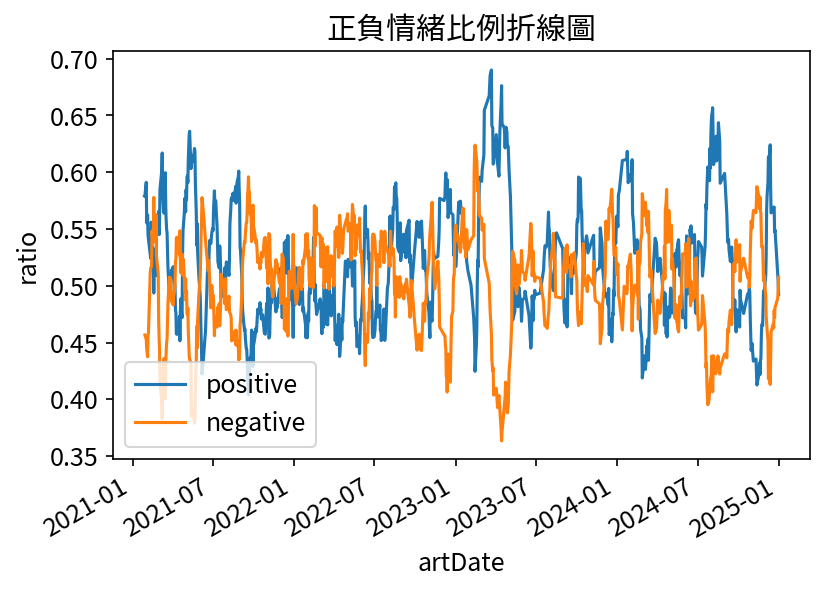

In [92]:
fig, ax = plt.subplots()

rolling_days = 14
ax.plot(pos["artDate"], pos["ratio"].rolling(rolling_days).mean(), color=colors[0])
ax.plot(neg["artDate"], neg["ratio"].rolling(rolling_days).mean(), color=colors[1])

plt.xlabel("artDate")
plt.ylabel("ratio")
ax.legend(["positive", "negative"], loc="lower left")
fig.autofmt_xdate()
plt.title("正負情緒比例折線圖")

In [93]:
sentiment_count.head(10)

artDate sentiments  size     ratio
3   2021-01-09   negative    36  0.507042
4   2021-01-09   positive    35  0.492958
9   2021-01-10   negative    78  0.614173
10  2021-01-10   positive    49  0.385827
13  2021-01-11   positive     1  1.000000
16  2021-01-12   negative    12  0.571429
17  2021-01-12   positive     9  0.428571
21  2021-01-13   negative    21  0.488372
22  2021-01-13   positive    22  0.511628
25  2021-01-14   negative     1  0.500000

In [94]:
ptt_sentiment_value = (
    sentiment_count.pivot_table(
        index="artDate", columns="sentiments", values="size", fill_value=0, aggfunc="sum")
    .reset_index()
    .rename_axis(None, axis=1)
)
ptt_sentiment_value.head()

artDate  negative  positive
0  2021-01-09        36        35
1  2021-01-10        78        49
2  2021-01-11         0         1
3  2021-01-12        12         9
4  2021-01-13        21        22

In [95]:
# sentiment 計算方式: positive - negative
ptt_sentiment_value["sentiment_value"] = (
    ptt_sentiment_value["positive"]
    - ptt_sentiment_value["negative"]
)
ptt_sentiment_value.head()

artDate  negative  positive  sentiment_value
0  2021-01-09        36        35               -1
1  2021-01-10        78        49              -29
2  2021-01-11         0         1                1
3  2021-01-12        12         9               -3
4  2021-01-13        21        22                1

Text(0.5, 1.0, '正負情緒分數趨勢折線圖')

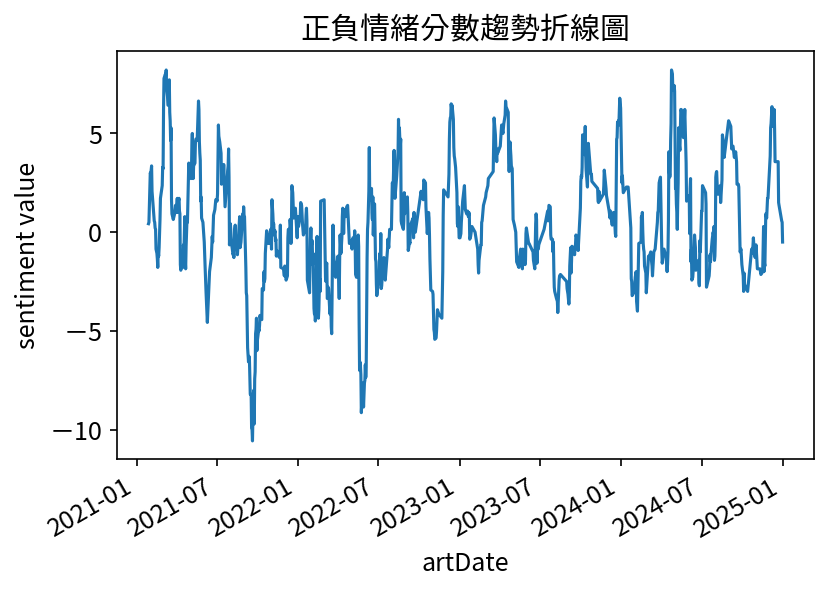

In [96]:
fig, ax = plt.subplots()

rolling_days = 14
ax.plot(ptt_sentiment_value["artDate"], ptt_sentiment_value["sentiment_value"].rolling(rolling_days).mean())
ax.set_xlabel("artDate")
ax.set_ylabel("sentiment value")
fig.autofmt_xdate()
plt.title("正負情緒分數趨勢折線圖")

文章為單位的情緒分析

In [97]:
sentiment_count_by_article = pd.DataFrame(
    ptt_liwc_df.groupby(["artUrl", "sentiments"]).size()
).reset_index()
sentiment_count_by_article = sentiment_count_by_article.rename(columns={0: "size"})
sentiment_count_by_article.head(10)

artUrl sentiments  size
0  https://www.ptt.cc/bbs/marriage/M.1610159827.A...     affect     7
1  https://www.ptt.cc/bbs/marriage/M.1610159827.A...        anx     1
2  https://www.ptt.cc/bbs/marriage/M.1610159827.A...   negative     5
3  https://www.ptt.cc/bbs/marriage/M.1610159827.A...        sad     1
4  https://www.ptt.cc/bbs/marriage/M.1610162736.A...     affect     3
5  https://www.ptt.cc/bbs/marriage/M.1610162736.A...      anger     1
6  https://www.ptt.cc/bbs/marriage/M.1610162736.A...   negative     1
7  https://www.ptt.cc/bbs/marriage/M.1610162736.A...   positive     2
8  https://www.ptt.cc/bbs/marriage/M.1610162736.A...        sad     1
9  https://www.ptt.cc/bbs/marriage/M.1610193770.A...     affect     8

In [98]:
ptt_sentiment_value_by_article = (
    sentiment_count_by_article.pivot_table(
        index="artUrl", columns="sentiments", values="size", fill_value=0
    )
    .reset_index()
    .rename_axis(None, axis=1)
)
ptt_sentiment_value_by_article.head()

artUrl  affect  anger  anx  \
0  https://www.ptt.cc/bbs/marriage/M.1610159827.A...     7.0    0.0  1.0   
1  https://www.ptt.cc/bbs/marriage/M.1610162736.A...     3.0    1.0  0.0   
2  https://www.ptt.cc/bbs/marriage/M.1610193770.A...     8.0    4.0  0.0   
3  https://www.ptt.cc/bbs/marriage/M.1610203445.A...     3.0    1.0  0.0   
4  https://www.ptt.cc/bbs/marriage/M.1610204919.A...    55.0    3.0  5.0   

   negative  positive  sad  
0       5.0       0.0  1.0  
1       1.0       2.0  1.0  
2       5.0       3.0  0.0  
3       1.0       2.0  0.0  
4      23.0      25.0  5.0

In [99]:
# sentiment 計算方式: positive - negative
ptt_sentiment_value_by_article["sentiment_value"] = (
    ptt_sentiment_value_by_article["positive"]
    - ptt_sentiment_value_by_article["negative"]
)
ptt_sentiment_value_by_article.head()

artUrl  affect  anger  anx  \
0  https://www.ptt.cc/bbs/marriage/M.1610159827.A...     7.0    0.0  1.0   
1  https://www.ptt.cc/bbs/marriage/M.1610162736.A...     3.0    1.0  0.0   
2  https://www.ptt.cc/bbs/marriage/M.1610193770.A...     8.0    4.0  0.0   
3  https://www.ptt.cc/bbs/marriage/M.1610203445.A...     3.0    1.0  0.0   
4  https://www.ptt.cc/bbs/marriage/M.1610204919.A...    55.0    3.0  5.0   

   negative  positive  sad  sentiment_value  
0       5.0       0.0  1.0             -5.0  
1       1.0       2.0  1.0              1.0  
2       5.0       3.0  0.0             -2.0  
3       1.0       2.0  0.0              1.0  
4      23.0      25.0  5.0              2.0

In [100]:
ptt_sentiment_value_by_article['sentiment_class'] = ptt_sentiment_value_by_article['sentiment_value'].apply(lambda x: "正向" if x > 0 else "負向" )
ptt_sentiment_value_by_article.head(10)

artUrl  affect  anger  anx  \
0  https://www.ptt.cc/bbs/marriage/M.1610159827.A...     7.0    0.0  1.0   
1  https://www.ptt.cc/bbs/marriage/M.1610162736.A...     3.0    1.0  0.0   
2  https://www.ptt.cc/bbs/marriage/M.1610193770.A...     8.0    4.0  0.0   
3  https://www.ptt.cc/bbs/marriage/M.1610203445.A...     3.0    1.0  0.0   
4  https://www.ptt.cc/bbs/marriage/M.1610204919.A...    55.0    3.0  5.0   
5  https://www.ptt.cc/bbs/marriage/M.1610206202.A...     4.0    0.0  0.0   
6  https://www.ptt.cc/bbs/marriage/M.1610247600.A...     9.0    2.0  0.0   
7  https://www.ptt.cc/bbs/marriage/M.1610259435.A...     5.0    1.0  0.0   
8  https://www.ptt.cc/bbs/marriage/M.1610265215.A...    15.0    2.0  1.0   
9  https://www.ptt.cc/bbs/marriage/M.1610273237.A...    86.0    8.0  6.0   

   negative  positive  sad  sentiment_value sentiment_class  
0       5.0       0.0  1.0             -5.0              負向  
1       1.0       2.0  1.0              1.0              正向  
2       5.0       3.0  0.0             -2.0              負向  
3       1.0       2.0  0.0              1.0              正向  
4      23.0      25.0  5.0              2.0              正向  
5       1.0       3.0  0.0              2.0              正向  
6       5.0       3.0  0.0             -2.0              負向  
7       3.0       1.0  1.0             -2.0              負向  
8       7.0       6.0  1.0             -1.0              負向  
9      55.0      31.0  2.0            -24.0              負向

In [101]:
clear_df_sentiment = pd.merge(df, ptt_sentiment_value_by_article[['artUrl', 'sentiment_class']], how="left")
clear_df_sentiment["artDate"] = pd.to_datetime(clear_df_sentiment["artDate"])
clear_df_sentiment['artDate'] = clear_df_sentiment['artDate'].dt.date

clear_df_sentiment.head()

system_id                                             artUrl  \
0          1  https://www.ptt.cc/bbs/marriage/M.1610159827.A...   
1          2  https://www.ptt.cc/bbs/marriage/M.1610162736.A...   
2          3  https://www.ptt.cc/bbs/marriage/M.1610190309.A...   
3          4  https://www.ptt.cc/bbs/marriage/M.1610193770.A...   
4          5  https://www.ptt.cc/bbs/marriage/M.1610203445.A...   

              artTitle     artDate artPoster artCatagory  \
0      [求助]真的可以不給看手機嗎？  2021-01-09  safelove    marriage   
1           Re:老公工作不穩定  2021-01-09     mayko    marriage   
2   Re:[求助]真的可以不給看手機嗎？  2021-01-09    loser1    marriage   
3     [心情]我搞不懂老公到底在想甚麼  2021-01-09   ChenJoy    marriage   
4  Re:[心情]我搞不懂老公到底在想甚麼  2021-01-09   xxshoxx    marriage   

                                          artContent  \
0  常常看大家說，偷看手機是不對的，\n但如果已經結婚了，太太想看你手機，\n真的可以拒絕嗎？\...   
1  因為男方工作不穩定,房東才不肯租,只好換女生承租,對吧\n很殘忍的說...這無緣的孩子聰明,...   
2  手機要看就給看啊！\n先帝爺不是說，\n一隻不夠，不能辦兩隻嗎？\n兩隻不夠，不能辦三隻嗎？...   
3  其實都是小事　但都可以吵到離婚　可能我們就是30幾歲的小孩（？）\n\n\n昨晚上床睡覺後一...   
4  把棉被翻好正面\n嗯嗯。\n有\n嗯，那你幹嘛抱怨你老公？\n不是誰上床睡覺還會檢查棉被正反...   

                                          artComment             e_ip  \
0  [{"cmtStatus": "推", "cmtPoster": "FlyOncidium"...  114.137.169.105   
1                                                 []    36.229.84.229   
2  [{"cmtStatus": "噓", "cmtPoster": "mark0204", "...  118.170.238.138   
3  [{"cmtStatus": "→", "cmtPoster": "artning", "c...   36.234.237.124   
4  [{"cmtStatus": "推", "cmtPoster": "GuoJia", "cm...     101.12.83.25   

          insertedDate dataSource sentiment_class  
0  2021-01-10 01:20:56        ptt              負向  
1  2021-01-10 01:20:56        ptt              正向  
2  2021-01-10 01:20:56        ptt             NaN  
3  2021-01-10 01:20:56        ptt              負向  
4  2021-01-10 01:20:56        ptt              正向

In [102]:
sentiment_art_count = pd.DataFrame(
    clear_df_sentiment.groupby(["artDate", "sentiment_class"]).size()
).reset_index()
sentiment_art_count = sentiment_art_count.rename(columns={0: "size"})
sentiment_art_count = sentiment_art_count.sort_values(["artDate"])
sentiment_art_count

artDate sentiment_class  size
0     2021-01-09              正向     4
1     2021-01-09              負向     2
2     2021-01-10              正向     1
3     2021-01-10              負向     6
4     2021-01-11              正向     1
...          ...             ...   ...
1118  2024-12-29              正向     1
1119  2024-12-29              負向     1
1121  2024-12-30              負向     2
1120  2024-12-30              正向     2
1122  2024-12-31              負向     4

[1123 rows x 3 columns]

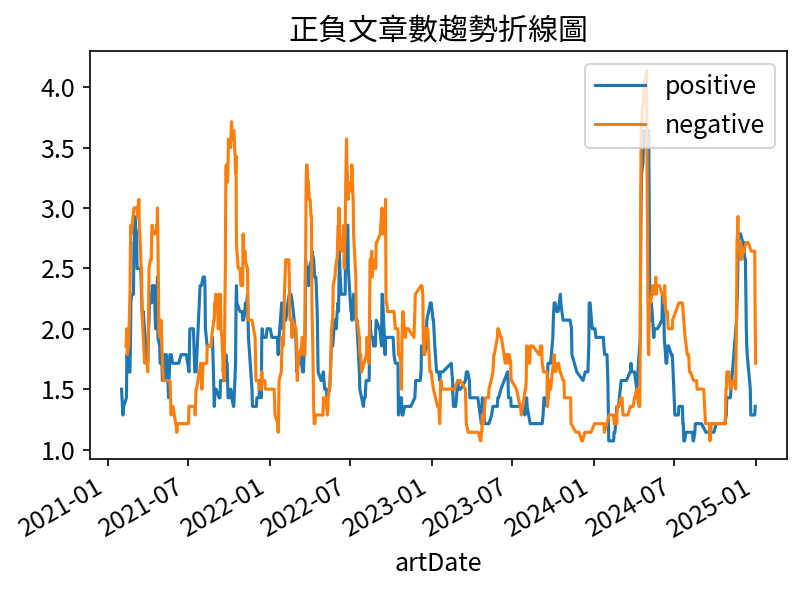

In [ ]:
colors = ["tab:blue", "tab:orange"]
pos = sentiment_art_count[sentiment_art_count["sentiment_class"] == "正向"]
neg = sentiment_art_count[sentiment_art_count["sentiment_class"] == "負向"]

# fig, ax = plt.subplots(figsize = (6,4), dpi = 150) # 也可以在該圖設定參數
fig, ax = plt.subplots()

# 使用 Series.rolling().mean() 來產生 14 天平均
rolling_days = 14
ax.plot(pos["artDate"], pos['size'].rolling(rolling_days).mean(), color=colors[0])
ax.plot(neg["artDate"], neg["size"].rolling(rolling_days).mean(), color=colors[1])
# ax.plot(pos["artDate"], pos['size'], color=colors[0])
# ax.plot(neg["artDate"], neg["size"], color=colors[1])

plt.xlabel("artDate")
# plt.ylabel('size')
ax.legend(["positive", "negative"], loc="upper right")
fig.autofmt_xdate()
plt.title("正負文章數趨勢折線圖")  # , fontproperties=fprop
plt.show()

由上圖可發現負面文章在大多數時間都多於正向文章

情緒代表字

In [104]:
word_count = ptt_liwc_df.groupby(["word", "sentiments"]).size().reset_index()
word_count = word_count.rename(columns={0: "size"})
word_count = word_count.sort_values(["size"], ascending=False)

word_count.head(10)

word sentiments  size
554    問題   negative  2354
553    問題     affect  2354
863    希望     affect   951
864    希望   positive   951
1051   情緒   negative   706
1050   情緒     affect   706
2529   重要   positive   516
2528   重要     affect   516
2328   解決   positive   511
2327   解決     affect   511

In [105]:
word_of_pos = word_count.loc[(word_count["sentiments"] == "positive")]
word_of_pos.head(15)

word sentiments  size
864    希望   positive   951
2529   重要   positive   516
2328   解決   positive   511
870    幫忙   positive   478
1601   決定   positive   470
484    同意   positive   452
2615   願意   positive   390
127    付出   positive   385
1962   相信   positive   380
1664   清楚   positive   375
2543   開心   positive   355
831    尊重   positive   337
2051   簡單   positive   317
2375   謝謝   positive   289
303    分享   positive   273

In [106]:
word_of_neg = word_count.loc[(word_count["sentiments"] == "negative")]
word_of_neg.head(15)

word sentiments  size
554    問題   negative  2354
1051   情緒   negative   706
654    壓力   negative   463
1255   抱怨   negative   370
1937   痛苦   negative   311
1363   擔心   negative   278
59     不爽   negative   264
1896   生氣   negative   253
1311   控制   negative   243
2399   負擔   negative   241
1263   拒絕   negative   226
1396   放棄   negative   193
615    嚴重   negative   189
2206   自我   negative   173
1821   犧牲   negative   149

C:\Users\0806b\AppData\Local\Temp\ipykernel_9752\1949587833.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels(pos["word"]) #, fontproperties=fprop
C:\Users\0806b\AppData\Local\Temp\ipykernel_9752\1949587833.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels(neg["word"]) #, fontproperties=fprop


Text(0.5, 1.0, '負向情緒總數')

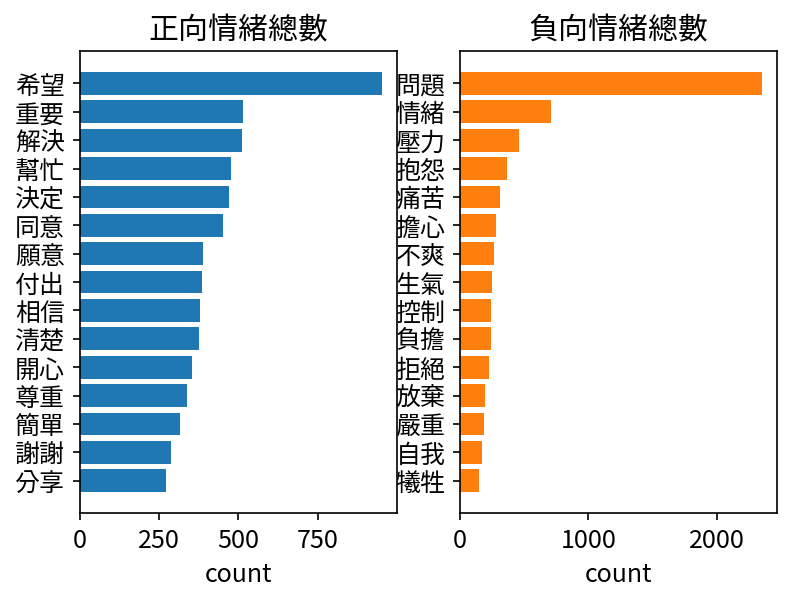

In [107]:
pos = word_of_pos.head(15).sort_values(["size"], ascending=True)
neg = word_of_neg.head(15).sort_values(["size"], ascending=True)

fig, ax = plt.subplots(1, 2)

ax[0].barh(pos["word"], pos["size"], color=colors[0])
ax[0].set_xlabel("count")
ax[0].set_yticklabels(pos["word"]) #, fontproperties=fprop
ax[0].set_title("正向情緒總數") #, fontproperties=fprop

ax[1].barh(neg["word"], neg["size"], color=colors[1])
ax[1].set_xlabel("count")
ax[1].set_yticklabels(neg["word"]) #, fontproperties=fprop
ax[1].set_title("負向情緒總數") #, fontproperties=fprop

檢查情緒詞是否符合文本

In [132]:
filtered_df = sent_df[sent_df['sentence'].str.contains('控制', na=False)]
filtered_df.head()

artUrl              artTitle  \
2487  https://www.ptt.cc/bbs/marriage/M.1612123068.A...    Re:[心情]跟先生常常為了小孩吵架   
3070  https://www.ptt.cc/bbs/marriage/M.1612593419.A...      Re:[閒聊]我真的做得不夠嗎?   
4318  https://www.ptt.cc/bbs/marriage/M.1613818734.A...       Re:[求助]因為性生活快離婚   
4888  https://www.ptt.cc/bbs/marriage/M.1613983443.A...      [求助]計算小孩生活費用及教育費   
5378  https://www.ptt.cc/bbs/marriage/M.1614528192.A...  Re:[求助]登記完成後才被告知要收聘金   

         artDate                                         artContent  \
2487  2021-02-01  看到這邊就很想回了, 我跟老婆完全就是跟你不同想法,\n我們從來沒有打過罵過孩子,\n但我們...   
3070  2021-02-06  你就兩手一攤說沒錢\n\n要你老婆拿錢出來\n\n不然全家人一起喝西北風\n\n看你敢不敢啊...   
4318  2021-02-20  怎麼看都覺得是妳老公有問題，\n超乎一般人情義理。\n誰會把胎兒生長的狀況看得比自己性事重要...   
4888  2021-02-22  1. 對於婚姻中發生的問題徵求建議與解決的方法。\n2. 須明確描述問題的前因後果與現況。\...   
5378  2021-03-01  既然你偏向離婚解決\n\n那麼可以先確認太太的想法，如果太太也想離\n\n直接雙方簽一簽，去...   

                         sentence  
2487               然後媽媽知道他自己會控制時間  
3070                   說自己老公控制欲很強  
4318                 控制狂或是常常言語貶低妳  
4888                 131m和m是顏色控制碼  
5378  你就讓愛財岳父深深認為你是個拿不出錢又控制不了的窮女婿

In [133]:
for sentence in filtered_df['sentence'].to_list():
    print(sentence)
    print("=========================")

然後媽媽知道他自己會控制時間
說自己老公控制欲很強
控制狂或是常常言語貶低妳
131m和m是顏色控制碼
你就讓愛財岳父深深認為你是個拿不出錢又控制不了的窮女婿
她的宗教價值和對子代的控制欲都這麼強
是顏色控制碼
我也因此有做飲食控制
畢竟15萬實在太香  只要能控制好你的口袋就好
藥物控制飲食控制運動控制都是方法之一
吃藥控制
這是完全無法控制的
大意是你只能掌握你能控制的部分
我也是很努力的控制自己的情緒好好跟她說話
我才發現他們都有情緒控制不佳的問題
是顏色控制碼
是顏色控制碼
對我來說控制好自己能控制的
是顏色控制碼
交往後逐漸顯露控制慾
是顏色控制碼
是顏色控制碼
是顏色控制碼
是顏色控制碼
說什麼他已經受不了我的控制
我想我們的情緒高張都只是想要控制場面
但不管怎樣都要有好的態度才有辦法控制場面
孩子也很難學會控制情緒
也開始學習欣賞不受控制的美感
又控制經濟
陳以文字表達時都已經無法控制情緒
   可是這種人通常非常善於說理與情緒控制
也就是控制
原Po的另一半在不動怒或意圖控制對方時
控制自己
而讓這些人無法控制自己的深層
有些人會用毒品控制
為什麼毒品能控制別
是顏色控制碼
你無法控制你的父母
但你可以控制自己如何待他們
他們父母控制慾很強沒錯
公婆完全不會有控制欲
她認為這就是控制
脫離婆家控制
不對的事還是不對藉親情的控制與
如果是老婆 就會聯想到往後二三十年都是被相同枷鎖控制的
而是看到靠著父母的資助 然後被綁住被控制住的人生 這種心理不健康的關係 會幸福才
這種女生或男生就是不能習慣這種被控制的生活
是顏色控制碼
和是顏色控制碼
我婆婆有非常嚴重的控制欲
因為控制不住會有2種走向
前面有一篇陪對方一起度過的 1他能控制 2他們沒小孩
是顏色控制碼
也會無法控制的很生氣
但我也想要有控制自己生活的權利
是顏色控制碼
但情緒來了完全沒辦法控制
131m和m是顏色控制碼
是顏色控制碼
也不在乎你老公根本控制不了自己媽媽
妳想要掌握控制先生買東西
 但又不想要自己買東西被掌握控制
結婚不是在坐牢或是被控制
被利用被控制還要承擔別人
煤氣燈效應的控制是非常恐怖的
有暴力傾向也想控制你
可是有煤氣燈效應的控制往往你身邊的親友察覺不到也不會重視甚至告訴你有碗飯吃安穩
以下為了敘事方便將控制者簡稱那個人
7控制你的經濟或是告訴你
對你關心讓他可以重新控制你


重新計算情緒

In [134]:
# 設定要移除的字詞列表
words_to_remove = ['付出']
# 使用 ~ 運算子和 isin() 方法過濾掉包含在 words_to_remove 列表中的行
liwc_dict_revise = liwc_dict[~liwc_dict['word'].isin(words_to_remove)]
# 使用更新後的情緒字典 merge
ptt_liwc_df_revise = pd.merge(noStop_df[["artUrl", "artDate", "artTitle", "artContent","word"]], liwc_dict_revise, how="left")
ptt_liwc_df_revise.head()

artUrl     artDate  \
0  https://www.ptt.cc/bbs/marriage/M.1610159827.A...  2021-01-09   
1  https://www.ptt.cc/bbs/marriage/M.1610159827.A...  2021-01-09   
2  https://www.ptt.cc/bbs/marriage/M.1610159827.A...  2021-01-09   
3  https://www.ptt.cc/bbs/marriage/M.1610159827.A...  2021-01-09   
4  https://www.ptt.cc/bbs/marriage/M.1610159827.A...  2021-01-09   

          artTitle                                         artContent word  \
0  [求助]真的可以不給看手機嗎？  常常看大家說，偷看手機是不對的，\n但如果已經結婚了，太太想看你手機，\n真的可以拒絕嗎？\...   偷看   
1  [求助]真的可以不給看手機嗎？  常常看大家說，偷看手機是不對的，\n但如果已經結婚了，太太想看你手機，\n真的可以拒絕嗎？\...   手機   
2  [求助]真的可以不給看手機嗎？  常常看大家說，偷看手機是不對的，\n但如果已經結婚了，太太想看你手機，\n真的可以拒絕嗎？\...   手機   
3  [求助]真的可以不給看手機嗎？  常常看大家說，偷看手機是不對的，\n但如果已經結婚了，太太想看你手機，\n真的可以拒絕嗎？\...   拒絕   
4  [求助]真的可以不給看手機嗎？  常常看大家說，偷看手機是不對的，\n但如果已經結婚了，太太想看你手機，\n真的可以拒絕嗎？\...   拒絕   

  sentiments  
0        NaN  
1        NaN  
2        NaN  
3     affect  
4   negative

C:\Users\0806b\AppData\Local\Temp\ipykernel_9752\1972960539.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels(pos["word"]) #, fontproperties=fprop
C:\Users\0806b\AppData\Local\Temp\ipykernel_9752\1972960539.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels(neg["word"]) #, fontproperties=fprop


Text(0.5, 1.0, '負向情緒總數')

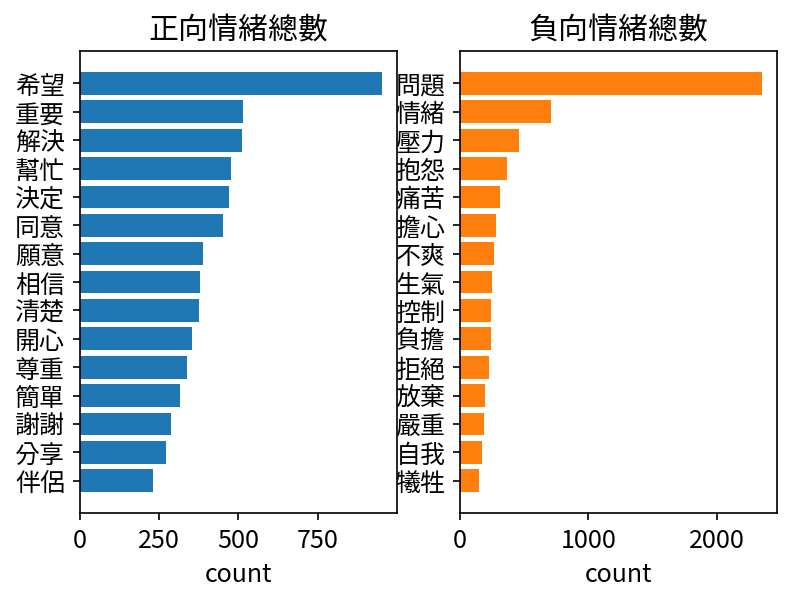

In [135]:
word_count = ptt_liwc_df_revise.groupby(["word", "sentiments"]).size().reset_index()

word_count = word_count.rename(columns={0: "size"})
word_count = word_count.sort_values(["size"], ascending=False)

word_of_pos = word_count.loc[(word_count["sentiments"] == "positive")]
word_of_neg = word_count.loc[(word_count["sentiments"] == "negative")]

pos = word_of_pos.head(15).sort_values(["size"], ascending=True)
neg = word_of_neg.head(15).sort_values(["size"], ascending=True)

fig, ax = plt.subplots(1, 2)

ax[0].barh(pos["word"], pos["size"], color=colors[0])
ax[0].set_xlabel("count")
ax[0].set_yticklabels(pos["word"]) #, fontproperties=fprop
ax[0].set_title("正向情緒總數") #, fontproperties=fprop

ax[1].barh(neg["word"], neg["size"], color=colors[1])
ax[1].set_xlabel("count")
ax[1].set_yticklabels(neg["word"]) #, fontproperties=fprop
ax[1].set_title("負向情緒總數") #, fontproperties=fprop

重新繪製情緒分數趨勢圖

Text(0.5, 1.0, '正負情緒分數趨勢折線圖')

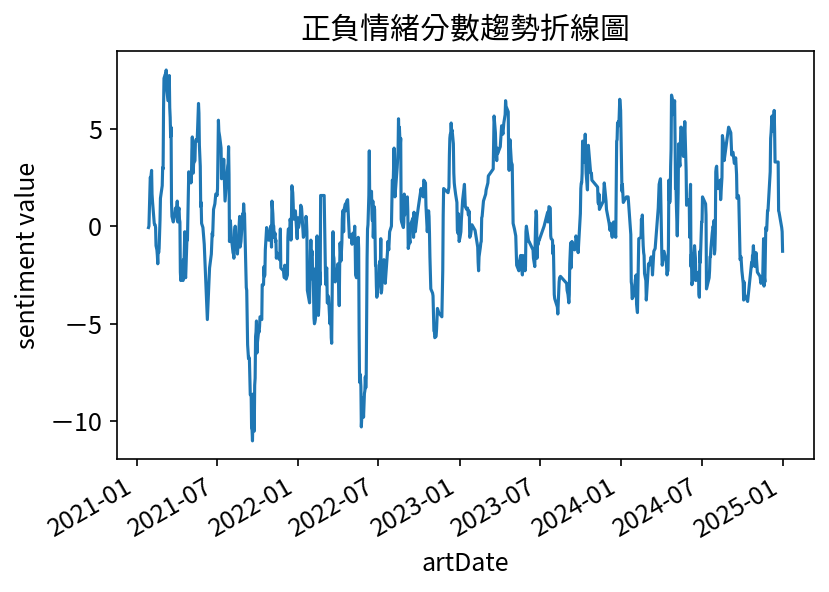

In [136]:
sentiment_count_revise = pd.DataFrame(
    ptt_liwc_df_revise.groupby(["artDate", "sentiments"]).size()
).reset_index()

mask = (sentiment_count_revise['sentiments'] == "positive") | (sentiment_count_revise['sentiments'] == "negative") 
sentiment_count_revise = sentiment_count_revise.loc[mask]

sentiment_count_revise = sentiment_count_revise.rename(columns={0: "size"})
sentiment_count_revise = sentiment_count_revise.sort_values(["artDate"])

ptt_sentiment_value_revise = (
    sentiment_count_revise.pivot_table(
        index="artDate", columns="sentiments", values="size", fill_value=0
    )
    .reset_index()
    .rename_axis(None, axis=1)
)

# sentiment 計算方式: positive - negative
ptt_sentiment_value_revise["sentiment_value"] = (
    ptt_sentiment_value_revise["positive"]
    - ptt_sentiment_value_revise["negative"]
)

# 繪製情緒分數趨勢圖
fig, ax = plt.subplots()

rolling_days = 14
ax.plot(ptt_sentiment_value_revise["artDate"], ptt_sentiment_value_revise["sentiment_value"].rolling(rolling_days).mean())
ax.set_xlabel("artDate")
ax.set_ylabel("sentiment value")
fig.autofmt_xdate()
plt.title("正負情緒分數趨勢折線圖") #, fontproperties=fprop

#### 特定時間區段文字雲分析

#### 2021-07-15 ~2022-01-15 文字雲
2021-07-15 ~2022-01-15 在情緒分數趨勢圖上顯示比較低的分數，我們用文字雲來看一下這段時間出現了什麼關鍵字

In [137]:
ptt_liwc_df_revise = pd.merge(ptt_liwc_df_revise, ptt_sentiment_value_by_article[['artUrl', 'sentiment_class']], how="left")
ptt_liwc_df_revise.head()

artUrl     artDate  \
0  https://www.ptt.cc/bbs/marriage/M.1610159827.A...  2021-01-09   
1  https://www.ptt.cc/bbs/marriage/M.1610159827.A...  2021-01-09   
2  https://www.ptt.cc/bbs/marriage/M.1610159827.A...  2021-01-09   
3  https://www.ptt.cc/bbs/marriage/M.1610159827.A...  2021-01-09   
4  https://www.ptt.cc/bbs/marriage/M.1610159827.A...  2021-01-09   

          artTitle                                         artContent word  \
0  [求助]真的可以不給看手機嗎？  常常看大家說，偷看手機是不對的，\n但如果已經結婚了，太太想看你手機，\n真的可以拒絕嗎？\...   偷看   
1  [求助]真的可以不給看手機嗎？  常常看大家說，偷看手機是不對的，\n但如果已經結婚了，太太想看你手機，\n真的可以拒絕嗎？\...   手機   
2  [求助]真的可以不給看手機嗎？  常常看大家說，偷看手機是不對的，\n但如果已經結婚了，太太想看你手機，\n真的可以拒絕嗎？\...   手機   
3  [求助]真的可以不給看手機嗎？  常常看大家說，偷看手機是不對的，\n但如果已經結婚了，太太想看你手機，\n真的可以拒絕嗎？\...   拒絕   
4  [求助]真的可以不給看手機嗎？  常常看大家說，偷看手機是不對的，\n但如果已經結婚了，太太想看你手機，\n真的可以拒絕嗎？\...   拒絕   

  sentiments sentiment_class  
0        NaN              負向  
1        NaN              負向  
2        NaN              負向  
3     affect              負向  
4   negative              負向

In [138]:
sent_df = pd.merge(sent_df, ptt_sentiment_value_by_article[['artUrl', 'sentiment_class']], how="left")
sent_df.head()

artUrl         artTitle  \
0  https://www.ptt.cc/bbs/marriage/M.1610159827.A...  [求助]真的可以不給看手機嗎？   
1  https://www.ptt.cc/bbs/marriage/M.1610159827.A...  [求助]真的可以不給看手機嗎？   
2  https://www.ptt.cc/bbs/marriage/M.1610159827.A...  [求助]真的可以不給看手機嗎？   
3  https://www.ptt.cc/bbs/marriage/M.1610159827.A...  [求助]真的可以不給看手機嗎？   
4  https://www.ptt.cc/bbs/marriage/M.1610159827.A...  [求助]真的可以不給看手機嗎？   

      artDate                                         artContent  sentence  \
0  2021-01-09  常常看大家說，偷看手機是不對的，\n但如果已經結婚了，太太想看你手機，\n真的可以拒絕嗎？\...    常常看大家說   
1  2021-01-09  常常看大家說，偷看手機是不對的，\n但如果已經結婚了，太太想看你手機，\n真的可以拒絕嗎？\...  偷看手機是不對的   
2  2021-01-09  常常看大家說，偷看手機是不對的，\n但如果已經結婚了，太太想看你手機，\n真的可以拒絕嗎？\...  但如果已經結婚了   
3  2021-01-09  常常看大家說，偷看手機是不對的，\n但如果已經結婚了，太太想看你手機，\n真的可以拒絕嗎？\...   太太想看你手機   
4  2021-01-09  常常看大家說，偷看手機是不對的，\n但如果已經結婚了，太太想看你手機，\n真的可以拒絕嗎？\...   真的可以拒絕嗎   

  sentiment_class  
0              負向  
1              負向  
2              負向  
3              負向  
4              負向

In [139]:
date = "2021-07-15"
end_date = "2022-01-15"
mask = (ptt_liwc_df_revise['artDate'] >= pd.Timestamp(date).date()) & (
    ptt_liwc_df_revise['artDate'] <= pd.Timestamp(end_date).date()) & (
    ptt_liwc_df_revise['sentiment_class'] == "負向")

ptt_df_wc = ptt_liwc_df_revise.loc[mask]
ptt_df_wc.head(10)

artUrl     artDate  \
49945  https://www.ptt.cc/bbs/marriage/M.1626407911.A...  2021-07-16   
49946  https://www.ptt.cc/bbs/marriage/M.1626407911.A...  2021-07-16   
49947  https://www.ptt.cc/bbs/marriage/M.1626407911.A...  2021-07-16   
49948  https://www.ptt.cc/bbs/marriage/M.1626407911.A...  2021-07-16   
49949  https://www.ptt.cc/bbs/marriage/M.1626407911.A...  2021-07-16   
49950  https://www.ptt.cc/bbs/marriage/M.1626407911.A...  2021-07-16   
49951  https://www.ptt.cc/bbs/marriage/M.1626407911.A...  2021-07-16   
49952  https://www.ptt.cc/bbs/marriage/M.1626407911.A...  2021-07-16   
49953  https://www.ptt.cc/bbs/marriage/M.1626407911.A...  2021-07-16   
49954  https://www.ptt.cc/bbs/marriage/M.1626407911.A...  2021-07-16   

             artTitle                                         artContent word  \
49945  Re:[心情]門當戶對很重要  她是不是看了那篇\n老公帶老婆去銀行把錢還完\n\n老婆感動的說了謝謝之後\n老公馬上說\n...   銀行   
49946  Re:[心情]門當戶對很重要  她是不是看了那篇\n老公帶老婆去銀行把錢還完\n\n老婆感動的說了謝謝之後\n老公馬上說\n...   還完   
49947  Re:[心情]門當戶對很重要  她是不是看了那篇\n老公帶老婆去銀行把錢還完\n\n老婆感動的說了謝謝之後\n老公馬上說\n...   感動   
49948  Re:[心情]門當戶對很重要  她是不是看了那篇\n老公帶老婆去銀行把錢還完\n\n老婆感動的說了謝謝之後\n老公馬上說\n...   謝謝   
49949  Re:[心情]門當戶對很重要  她是不是看了那篇\n老公帶老婆去銀行把錢還完\n\n老婆感動的說了謝謝之後\n老公馬上說\n...   謝謝   
49950  Re:[心情]門當戶對很重要  她是不是看了那篇\n老公帶老婆去銀行把錢還完\n\n老婆感動的說了謝謝之後\n老公馬上說\n...   改天   
49951  Re:[心情]門當戶對很重要  她是不是看了那篇\n老公帶老婆去銀行把錢還完\n\n老婆感動的說了謝謝之後\n老公馬上說\n...   還的   
49952  Re:[心情]門當戶對很重要  她是不是看了那篇\n老公帶老婆去銀行把錢還完\n\n老婆感動的說了謝謝之後\n老公馬上說\n...   差別   
49953  Re:[心情]門當戶對很重要  她是不是看了那篇\n老公帶老婆去銀行把錢還完\n\n老婆感動的說了謝謝之後\n老公馬上說\n...   給錢   
49954  Re:[心情]門當戶對很重要  她是不是看了那篇\n老公帶老婆去銀行把錢還完\n\n老婆感動的說了謝謝之後\n老公馬上說\n...  然後才   

      sentiments sentiment_class  
49945        NaN              負向  
49946        NaN              負向  
49947        NaN              負向  
49948     affect              負向  
49949   positive              負向  
49950        NaN              負向  
49951        NaN              負向  
49952        NaN              負向  
49953        NaN              負向  
49954        NaN              負向

In [140]:
date = "2021-07-15"
end_date = "2022-01-15"
mask = (ptt_liwc_df_revise['artDate'] >= pd.Timestamp(date).date()) & (
    ptt_liwc_df_revise['artDate'] <= pd.Timestamp(end_date).date()) & (
    ptt_liwc_df_revise['sentiment_class'] == "負向")

ptt_df_wc = ptt_liwc_df_revise.loc[mask, ["artDate", "word"]]


word_count_count = pd.DataFrame(
    ptt_df_wc.groupby(["word"]).size()
).reset_index().rename(columns={0: "size"})

word_count_count = word_count_count.sort_values(by='size', ascending=False)
word_count_count.head(10)

word  size
2305   問題   404
4380   抱怨   201
3912   情緒   164
3428   工作   122
3191   家庭   120
3475   希望   116
6164   生氣   102
6332   痛苦   100
6167   生活    97
4659   擔心    93

(-0.5, 1599.5, 799.5, -0.5)

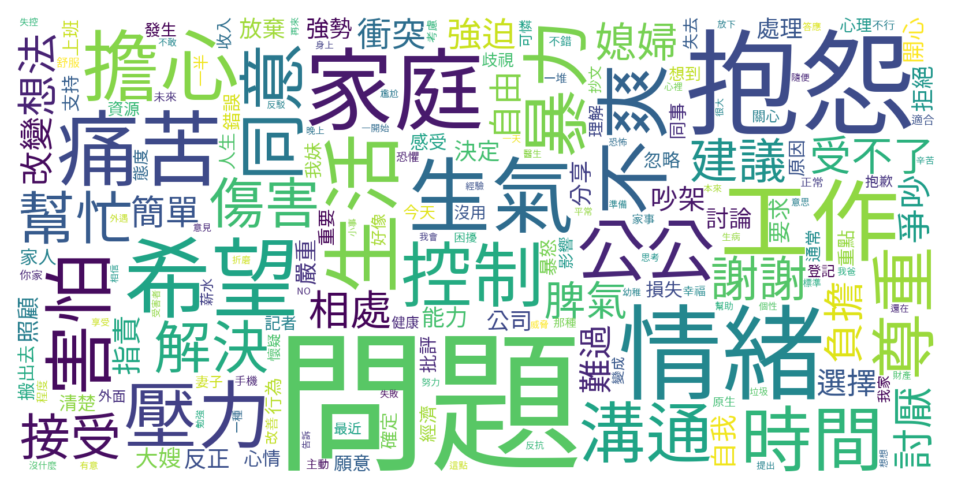

In [142]:
# wordcloud 的 input 是 dictionary
#font_path = "./raw_data/SourceHanSansTW-Regular.otf"  # 中文字型路徑
#wc_dict = dict(zip(word_count_count['word'], word_count_count['size']))
cloud = WordCloud(scale = 4, max_words=200, background_color="white", font_path=FontPath)
cloud.generate_from_frequencies(wc_dict)
# 繪圖
plt.figure(figsize=(8, 4), dpi=150)
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
# plt.show()

關鍵字出現了「問題」、「抱怨」的關鍵字

In [ ]:
date = "2021-07-15"
end_date = "2022-01-15"
mask = (ptt_liwc_df_revise['artDate'] >= pd.Timestamp(date).date()) & (
    ptt_liwc_df_revise['artDate'] <= pd.Timestamp(end_date).date()) & ( # 時間區間
    ptt_liwc_df_revise['sentiment_class'] == "負向")  & ( # 負面文章
    ptt_liwc_df_revise['artContent'].str.contains('問題')) & ( # 內文包含問題
    ptt_liwc_df_revise["sentiments"] == "negative") # 負面情緒字

ptt_df_wc = ptt_liwc_df_revise.loc[mask, ["artDate", "word"]]
wc = ptt_df_wc.groupby(["word"]).size().to_dict()

# wordcloud 的 input 是 dictionary
cloud = WordCloud(scale = 4, max_words=200, background_color="white", font_path=FontPath, colormap="GnBu")
cloud.generate_from_frequencies(wc)
# 繪圖
plt.figure(figsize=(8, 4), dpi=150)
plt.imshow(
    cloud, 
    interpolation="bilinear"
)
plt.axis("off")
# plt.show()

利用「情緒」去查看原文內容

In [ ]:
date = "2021-07-15"
end_date = "2022-01-15"
mask = (sent_df['artDate'] >= pd.Timestamp(date).date()) & (
    sent_df['artDate'] <= pd.Timestamp(end_date).date()) & (
    sent_df['sentiment_class'] == "負向") & (
    sent_df['artContent'].str.contains('問題')) & (
    sent_df['sentence'].str.contains('情緒')) # 包含「情緒」的句子

df_ = sent_df.loc[mask, ["artDate", "artContent", "sentence"]]
index_list = df_.index.tolist()


# 取得前後各5筆的索引 => 目的為查看包含該詞彙句子的上下文
surrounding_indices = []
for index in index_list:
    surrounding_indices.extend(range(index - 5, index + 6))

# 去除重複的索引，並確保不超出範圍
surrounding_indices = list(set(filter(lambda x: x >= 0 and x < len(sent_df), surrounding_indices)))

# 依據索引取得相應的資料
result_df = sent_df.iloc[surrounding_indices].sort_index()
result_df[['artTitle', 'sentence', 'sentiment_class']]

artTitle               sentence sentiment_class
20546  Re:[閒聊]跟另一半討論吃什麼搞到快瘋掉                     首先              負向
20547  Re:[閒聊]跟另一半討論吃什麼搞到快瘋掉         我真的覺得原po妳的性情很好              負向
20548  Re:[閒聊]跟另一半討論吃什麼搞到快瘋掉    可以忍受先生常常反覆無常又要做又要嫌的              負向
20549  Re:[閒聊]跟另一半討論吃什麼搞到快瘋掉                     特質              負向
20550  Re:[閒聊]跟另一半討論吃什麼搞到快瘋掉               但還是要請你小心              負向
...                      ...                    ...             ...
38116       Re:[求助]女友和原生家庭不好                我完全不能接受              負向
38117       Re:[求助]女友和原生家庭不好            她以一個結婚了二三十年              負向
38118       Re:[求助]女友和原生家庭不好  沒有經濟能力自尊心薄弱被傳統折磨的女人來說              負向
38119       Re:[求助]女友和原生家庭不好              她說的很多都有道理              負向
38120       Re:[求助]女友和原生家庭不好               未來剩下你在工作              負向

[572 rows x 3 columns]

# 情緒分析2

In [1]:
from ckiptagger import data_utils, construct_dictionary, WS, POS, NER
import re
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import time
import datetime

In [2]:
data_utils.download_data_gdown("./")  # 下載ckip model

Downloading...
From (original): https://drive.google.com/uc?id=1efHsY16pxK0lBD2gYCgCTnv1Swstq771
From (redirected): https://drive.google.com/uc?id=1efHsY16pxK0lBD2gYCgCTnv1Swstq771&confirm=t&uuid=d8f02420-16dc-4ebd-8b38-d3cae76cf1db
To: c:\Users\USER\Downloads\------main\------main\data.zip
100%|██████████| 1.88G/1.88G [00:45<00:00, 41.4MB/s]


In [3]:
# 將三份工具的模型路徑指向剛才下載的檔案「data」
ws = WS("./data")
pos = POS("./data")
ner = NER("./data")

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ckiptagger\model_ws.py:106: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ckiptagger\model_pos.py:56: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ckipta

In [4]:
## 讀取資料
df = pd.read_csv('text.csv')
df.head(3)

system_id                                             artUrl  \
0          1  https://www.ptt.cc/bbs/marriage/M.1610159827.A...   
1          2  https://www.ptt.cc/bbs/marriage/M.1610162736.A...   
2          3  https://www.ptt.cc/bbs/marriage/M.1610190309.A...   

             artTitle              artDate artPoster artCatagory  \
0     [求助]真的可以不給看手機嗎？  2021-01-09 10:37:05  safelove    marriage   
1          Re:老公工作不穩定  2021-01-09 11:25:34     mayko    marriage   
2  Re:[求助]真的可以不給看手機嗎？  2021-01-09 19:05:00    loser1    marriage   

                                          artContent  \
0  常常看大家說，偷看手機是不對的，\n但如果已經結婚了，太太想看你手機，\n真的可以拒絕嗎？\...   
1  因為男方工作不穩定,房東才不肯租,只好換女生承租,對吧\n很殘忍的說...這無緣的孩子聰明,...   
2  手機要看就給看啊！\n先帝爺不是說，\n一隻不夠，不能辦兩隻嗎？\n兩隻不夠，不能辦三隻嗎？...   

                                          artComment             e_ip  \
0  [{"cmtStatus": "推", "cmtPoster": "FlyOncidium"...  114.137.169.105   
1                                                 []    36.229.84.229   
2  [{"cmtStatus": "噓", "cmtPoster": "mark0204", "...  118.170.238.138   

          insertedDate dataSource  
0  2021-01-10 01:20:56        ptt  
1  2021-01-10 01:20:56        ptt  
2  2021-01-10 01:20:56        ptt

定義文字清理的相關function

In [7]:
def Segmentation_Core(data, tokenizer):
    # 將所有的斷行字元配上 escape 以防失效
    regexPattern = '|'.join(map(re.escape, tokenizer))
    output_list = re.split(regexPattern, data)
    # 過濾空白行
    output_list = list(filter(None, output_list))
    return output_list

def Sentence_Segmentation(article, keep_digits=False, keep_alphabets=False):
    """ Sentence_Segmentation function 用於執行中文斷行任務

    順序如下：
    1. 去除(\\n)
    2. 去除特殊符號字元
    3. 保留數字
    4. 依照斷句字元進行斷句全形的分號、逗號、句號、問號以及驚嘆號
    5. 避免空白斷句結果

    Args:
        article(string): 欲斷行之文章內容
        keep_digits(Boolean): 決定是否保留數字於斷行後的結果
        keep_alphabets(Boolean): 決定是否保留字母於斷行後的結果
    Returns:
        List [] 每個 element 就是一行
    """
    sepical_symbols = r'[.＂<>:《》+\-=#$%&()*@＃＄％＆＇\(\)\[\]\{\}（）＊＋－／：\
    ＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—一‘’‛“”„‟…‧﹏★→─]+'
    segmentation_used_note = (";", "；", "！", "!", "？", "?", "。")
    

    paragraphs = list(filter(lambda x: re.sub(r'\s+','', x), article.split("\n")))
    # print(len(paragraphs))
    # print(paragraphs)
    
    result = []
    for paragraph in paragraphs:

        clean_paragraph = paragraph
        try:
            if not keep_digits:
                clean_paragraph = re.sub(r'\d*\.?\d+','', clean_paragraph) #remove space & digits
            if not keep_alphabets:
                clean_paragraph = re.sub('[a-zA-Z]+', '', clean_paragraph)
            
            clean_paragraph = re.sub(r'[\s]+','', clean_paragraph) #remove space
            
            clean_paragraph = re.sub(sepical_symbols,'',clean_paragraph)
            
        except:
            return "error"
        
        res = Segmentation_Core(clean_paragraph, segmentation_used_note)
        result.append(res)
    
    return result

CKIP 處理相關function

In [18]:
# 自定義辭典
with open('dict/user_dict.txt', encoding='utf-8') as f:
    lines = f.read().splitlines()

dict = {k.split()[0]: k.split()[1] for v, k in enumerate(lines)}
dictionary2 = construct_dictionary(dict)
print(dictionary2)

[(3, {'監護權': 500.0, '贍養費': 500.0, '婚姻法': 500.0, '探視權': 500.0, '離婚率': 500.0}), (4, {'離婚協議': 500.0, '婚姻關係': 500.0, '夫妻財產': 500.0, '感情破裂': 500.0, '離婚訴訟': 500.0, '離婚手續': 500.0, '財產分配': 500.0, '婚姻破裂': 500.0, '子女撫養': 500.0, '法律程序': 500.0, '離婚證書': 500.0, '單親家庭': 500.0, '精神虐待': 500.0, '家暴證據': 500.0, '法院調解': 500.0, '家事法庭': 500.0, '婚姻諮商': 500.0, '離婚律師': 500.0, '婚前協議': 500.0, '離婚登記': 500.0, '夫妻溝通': 500.0, '離異家庭': 500.0, '分居協議': 500.0, '感情不和': 500.0, '重組家庭': 500.0, '婚姻危機': 500.0, '離婚判決': 500.0, '孩子監護': 500.0, '親權義務': 500.0, '財務糾紛': 500.0, '配偶權利': 500.0, '離婚風險': 500.0, '離婚心理': 500.0, '夫妻協議': 500.0, '財產爭議': 500.0, '婚姻存續': 500.0, '婚姻破碎': 500.0, '分開生活': 500.0, '單身生活': 500.0, '再婚問題': 500.0}), (5, {'變更監護權': 500.0, '未成年子女': 500.0, '撫養費計算': 500.0}), (6, {'夫妻共同財產': 500.0})]


In [19]:
def get_pos(post_id, word_sentence, pos_sentence):
    tokens = []
    # print("\nPOS: ", end="\u3000")
    assert len(word_sentence) == len(pos_sentence)
    for word, pos in zip(word_sentence, pos_sentence): # token level
        tokens.append([post_id, word, pos]) 
    # print(f"{word}({pos})", end="\u3000")
    return tokens

def get_ner(post_id, entity_sentence):
    entities = []
    # print("\nNER:___________ ")
    for entity in sorted(entity_sentence): # token level
        entities.append([post_id, entity[3], entity[2]]) 
    return entities

def get_nlp_result(data_df):
    start = time.time()

    pos_list = []
    entity_list = []
    sentence_list = []
    
    # 遍歷 dataframe 的每筆資料
    for index, row in data_df.iterrows(): # document level    
    # print(f"\ndocument {index}") 

        # 資料清理 ＆ 斷句
        tmp = Sentence_Segmentation(row['artContent']) 
        flat_list = [item for sublist in tmp for item in sublist]

        # ckip
        word_sentence_list = ws(flat_list, coerce_dictionary = dictionary2)
        pos_sentence_list = pos(word_sentence_list)
        entity_sentence_list = ner(word_sentence_list, pos_sentence_list)

        # 遍歷該 document 中的每一個句子
        for i, sentence in enumerate(flat_list):
            # print(f"sentence {i}: {sentence}")
            sentence_list.append([row['system_id'], sentence])            
            temp_tokens = get_pos(row['system_id'], word_sentence_list[i], pos_sentence_list[i])
            temp_entites = get_ner(row['system_id'], entity_sentence_list[i])

            pos_list.append(temp_tokens)
            if len(temp_entites) != 0:
                entity_list.append(temp_entites)
            
    pos_flat = [item for sublist in pos_list for item in sublist]
    entity_flat = [item for sublist in entity_list for item in sublist]

    pos_table = pd.DataFrame(data=pos_flat, 
                    columns=['system_id','word','pos'])        
    
    entity_table = pd.DataFrame(data=entity_flat, 
                        columns=['system_id','word','ner']) 

    sentence_table = pd.DataFrame(data=sentence_list, 
                    columns=['system_id','sentence']) 

    end = time.time()
    print("time costing: {}".format(end - start))

    return pos_table, entity_table, sentence_table

In [20]:
# 看看 tmp 和 flat_list 有什麼差別
tmp = Sentence_Segmentation(df['artContent'][0]) 
flat_list = [item for sublist in tmp for item in sublist]
print(tmp[:5])
print(flat_list[:5])

[['常常看大家說，偷看手機是不對的，'], ['但如果已經結婚了，太太想看你手機，'], ['真的可以拒絕嗎'], ['感覺你拒絕，就是心裡有鬼，'], ['只是讓太太猜忌，自己日子難過']]
['常常看大家說，偷看手機是不對的，', '但如果已經結婚了，太太想看你手機，', '真的可以拒絕嗎', '感覺你拒絕，就是心裡有鬼，', '只是讓太太猜忌，自己日子難過']


In [22]:
pos_table, entity_table, sentence_table = get_nlp_result(df)

time costing: 606.3229901790619


In [23]:
pos_table.head() # word pos 列表

system_id word            pos
0          1   常常              D
1          1    看             VC
2          1   大家             Nh
3          1    說             VE
4          1    ，  COMMACATEGORY

In [24]:
# 檢查筆數
print(f"total posts numbers: {len(pos_table['system_id'].unique())}") # 1628篇文
print(f"posts have NER: {len(entity_table['system_id'].unique())}") # 1620篇有抓到ner

total posts numbers: 2204
posts have NER: 1919


In [26]:
# 將文章存成csv
pos_table.to_csv('raw_data/zh/pos_table_buffet.csv', index = False)
entity_table.to_csv('raw_data/zh/entity_table_buffet.csv', index = False)
sentence_table.to_csv('raw_data/zh/sentence_table_buffet.csv', index = False)

探索分析 - NER

In [27]:
# 讀取已經執行完畢的結果
pos_table = pd.read_csv("pos_table_buffet.csv") 
entity_table = pd.read_csv("entity_table_buffet.csv") 
sentence_table = pd.read_csv("sentence_table_buffet.csv") 

In [28]:
entity_table['ner'].unique()

array(['DATE', 'PERSON', 'CARDINAL', 'TIME', 'ORG', 'LOC', 'MONEY',
       'ORDINAL', 'GPE', 'FAC', 'NORP', 'WORK_OF_ART', 'EVENT',
       'LANGUAGE', 'PERCENT', 'LAW', 'PRODUCT', 'QUANTITY'], dtype=object)

In [29]:
ner_count = entity_table.groupby(['ner'])['ner'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(10)
ner_count

ner  count
1       DATE   4203
0   CARDINAL   3723
13    PERSON   1793
4        GPE   1632
16      TIME   1111
10   ORDINAL    688
11       ORG    318
9       NORP    251
8      MONEY    226
5   LANGUAGE    190

Text(0.5, 0, 'Frequency')

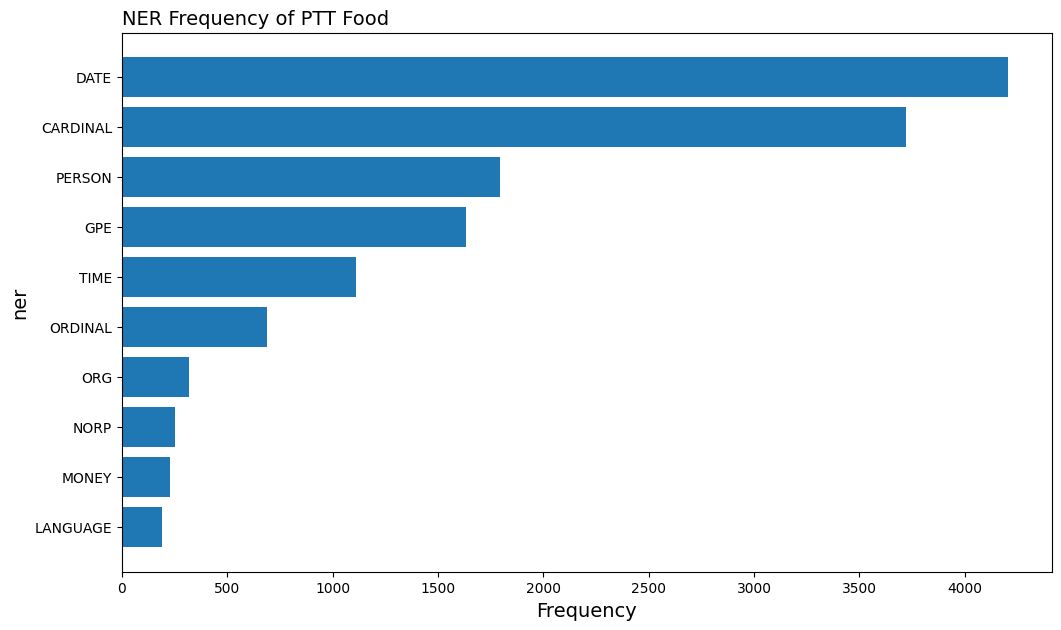

In [ ]:
ner = ner_count['ner']
count = ner_count['count']

fig, ax = plt.subplots(figsize =(12, 7))
ax.barh(ner, count)
ax.invert_yaxis()
ax.set_title('NER Frequency of PTT divorce',loc ='left', size = 14)
ax.set_ylabel('ner', size = 14)
ax.set_xlabel('Frequency', size = 14)
# fig.show()

### 涉及到的民族、宗教、政治團體(NORP)

Text(0.5, 0, 'Word Frequency')

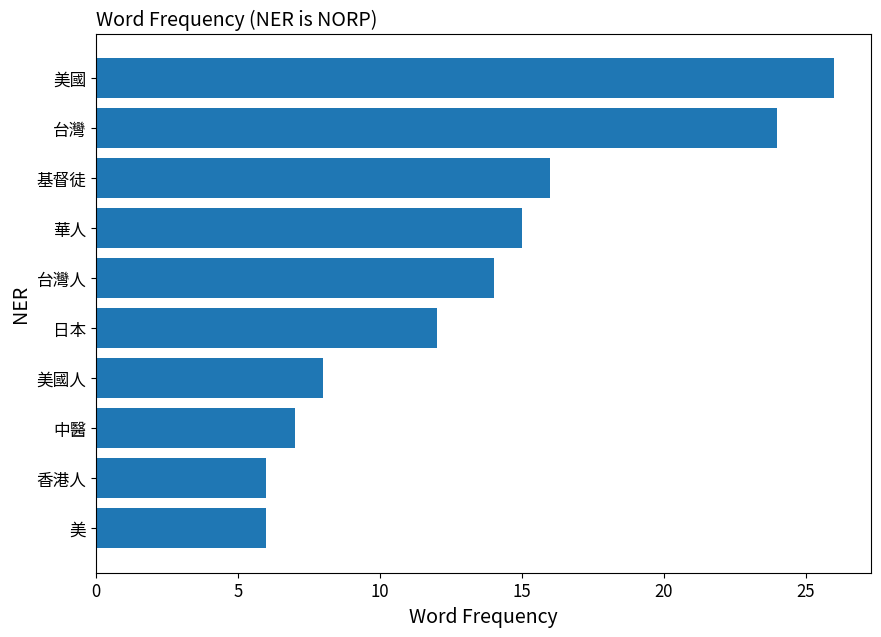

In [37]:
# 篩選ner為NORP的資料
l_noun = ["NORP"]
NORP = entity_table[entity_table.ner.isin(l_noun)]

# # 計算每個名詞提到的次數，選出前10個
ner_count = NORP.groupby('word')['word'].agg(['count'])
ner_count = ner_count.sort_values(['count'],ascending=False)['count'].nlargest(10).reset_index()
ner_count

# 設定中文字形
word = ner_count['word']
count = ner_count['count']

fig, ax = plt.subplots(figsize =(10, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (NER is NORP)',loc ='left', size = 14)
ax.set_ylabel('NER', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
# fig.show()

### 涉及到的組織(ORG)

Text(0.5, 0, 'Word Frequency')

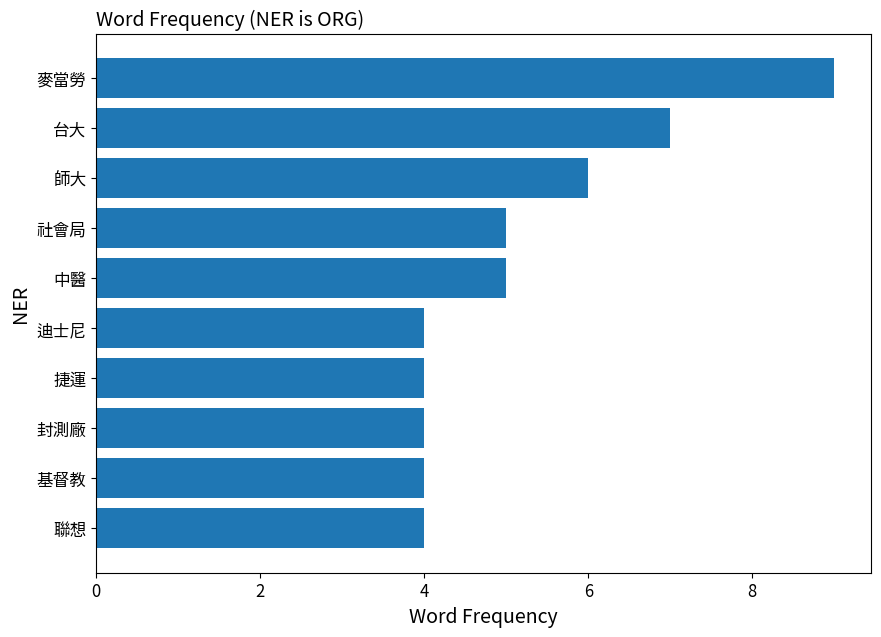

In [39]:
# 篩選ner為ORG的資料
l_noun = ["ORG"]
ORG = entity_table[entity_table.ner.isin(l_noun)]

# # 計算每個名詞提到的次數，選出前10個
ner_count = ORG.groupby('word')['word'].agg(['count'])
ner_count = ner_count.sort_values(['count'],ascending=False)['count'].nlargest(10).reset_index()
ner_count

# 設定中文字形
word = ner_count['word']
count = ner_count['count']

fig, ax = plt.subplots(figsize =(10, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (NER is ORG)',loc ='left', size = 14)
ax.set_ylabel('NER', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
# fig.show()

### 涉及到的人名(PERSON)

Text(0.5, 0, 'Word Frequency')

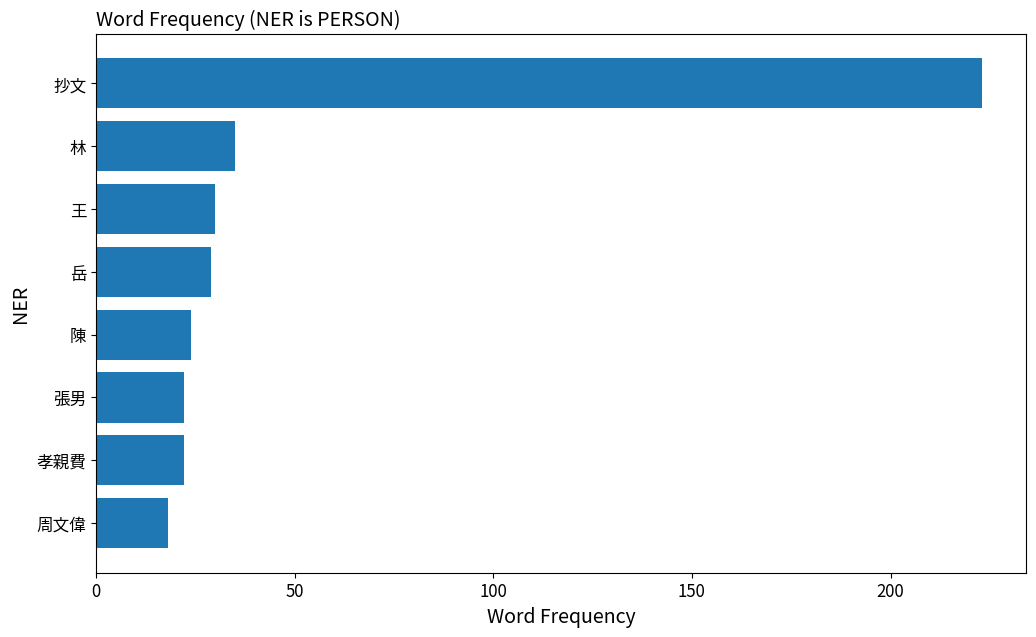

In [40]:
# 篩選ner為PERSON的資料
l_noun = ["PERSON"]
PERSON = entity_table[entity_table.ner.isin(l_noun)]

# 計算每個名詞提到的次數，選出前8個
ner_count = PERSON.groupby('word')['word'].agg(['count'])
ner_count = ner_count.sort_values(['count'],ascending=False)['count'].nlargest(8).reset_index()

# 設定中文字形
word = ner_count['word']
count = ner_count['count']

fig, ax = plt.subplots(figsize =(12, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (NER is PERSON)',loc ='left', size = 14)
ax.set_ylabel('NER', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
# fig.show()

下面找出「偷吃」相關文章，與後續情緒分析一起做探索

In [41]:
keyword_list = [
    "外遇", "偷吃", "出軌", "偷腥", "劈腿", "紅杏出牆", "婚外情",
    "情婦", "小三", "小四", "小五", "情夫", "老王", "小白臉",
    "渣男", "渣女", "綠茶婊", "備胎", 
    "信任破裂", "背叛",
    "妨害家庭", "通姦"
]
shu_selected = df[df['artContent'].str.contains('|'.join(keyword_list),regex=True)]
print(f"{' '.join(keyword_list)}：{shu_selected.shape[0]}篇相關貼文")
shu_selected.head(3)

外遇 偷吃 出軌 偷腥 劈腿 紅杏出牆 婚外情 情婦 小三 小四 小五 情夫 老王 小白臉 渣男 渣女 綠茶婊 備胎 信任破裂 背叛 妨害家庭 通姦：320篇相關貼文


system_id                                             artUrl  \
0           1  https://www.ptt.cc/bbs/marriage/M.1610159827.A...   
6           7  https://www.ptt.cc/bbs/marriage/M.1610206202.A...   
19         20  https://www.ptt.cc/bbs/marriage/M.1610584018.A...   

                    artTitle              artDate   artPoster artCatagory  \
0            [求助]真的可以不給看手機嗎？  2021-01-09 10:37:05    safelove    marriage   
6               Re:[閒聊]離婚的掙扎  2021-01-09 23:30:01    aass5566    marriage   
19  Re:[求助]老婆說去上班實際是跟其他人去唱歌。  2021-01-14 08:26:51  season2011    marriage   

                                           artContent  \
0   常常看大家說，偷看手機是不對的，\n但如果已經結婚了，太太想看你手機，\n真的可以拒絕嗎？\...   
6   是不是陽明醫哥阿??\n\n  如果是的話 這個問題就好解決了\n如果是醫哥的話... 總之...   
19  有的人給的建議還不如原po自己的處置\n\n外遇都除罪化了\n抓到了也就賠30萬\n蒐集證據...   

                                           artComment             e_ip  \
0   [{"cmtStatus": "推", "cmtPoster": "FlyOncidium"...  114.137.169.105   
6   [{"cmtStatus": "噓", "cmtPoster": "ahtnamas", "...     36.237.62.32   
19  [{"cmtStatus": "推", "cmtPoster": "imreader", "...     114.46.1.133   

           insertedDate dataSource  
0   2021-01-10 01:20:56        ptt  
6   2021-01-10 01:20:58        ptt  
19  2021-01-15 01:09:08        ptt

#### POS 種類分析

In [42]:
pos_table['pos'].unique()

array(['D', 'VC', 'Nh', 'VE', 'COMMACATEGORY', 'Na', 'SHI', 'VH', 'T',
       'Cbb', 'VA', 'Di', 'VF', 'VK', 'Ng', 'V_2', 'VL', 'VJ', 'Nes',
       'Nf', 'P', 'DE', 'Dfa', 'Da', 'Nd', 'VG', 'VHC', 'Neqa', 'VD',
       'Nep', 'VCL', 'Nc', 'Caa', 'FW', 'Neu', 'Nb', 'Dk', 'Ncd', 'VB',
       'I', 'A', 'Nv', 'Cba', 'Dfb', 'VI', 'VAC', 'Cab', 'Neqb',
       'COLONCATEGORY', 'DM', 'PERIODCATEGORY', 'PARENTHESISCATEGORY',
       'ETCCATEGORY', 'DASHCATEGORY', 'PAUSECATEGORY'], dtype=object)

看看除了標點符號，大部分的POS都是哪一類

In [43]:
pos_filter = pos_table[~pos_table.pos.isin(['COMMACATEGORY', 'PARENTHESISCATEGORY', 'PERIODCATEGORY', 'COLONCATEGORY'])]

pos_count = pos_filter.groupby(['pos'])['pos'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(12)
pos_count

pos   count
17   Na  157216
5     D  147948
29   Nh   88789
38   VC   63396
44   VH   54895
7    DE   43837
31    P   35730
41   VE   32068
35   VA   30420
4   Cbb   27322
33  SHI   25268
27   Nf   22775

C:\Users\USER\AppData\Local\Temp\ipykernel_32896\2478466374.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


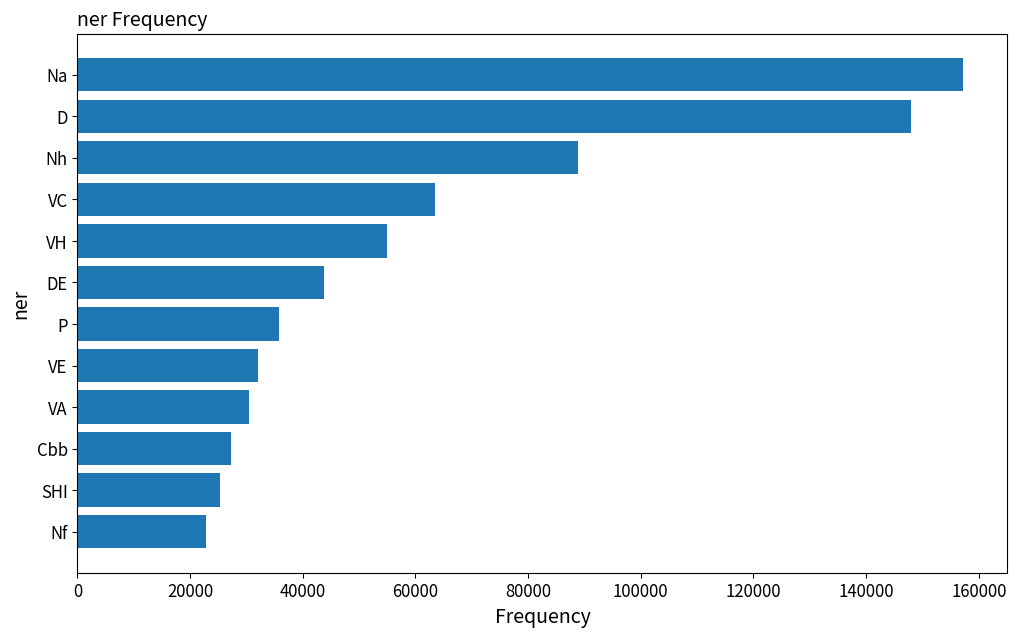

In [44]:
pos = pos_count['pos']
count = pos_count['count']

fig, ax = plt.subplots(figsize =(12, 7))
ax.barh(pos, count)
ax.invert_yaxis()
ax.set_title('ner Frequency',loc ='left', size = 14)
ax.set_ylabel('ner', size = 14)
ax.set_xlabel('Frequency', size = 14)
fig.show()

大部分是 Na 普通名詞 ，再來是 D 副詞 和 Nh 代名詞

### 涉及到的名詞(Noun)

In [46]:
# 篩選pos為專有名詞的資料
l_noun = ["Nb"] #,"Na"
noun = pos_table[pos_table.pos.isin(l_noun)]

# 計算每個名詞提到的次數，選出前15個
noun_count = noun[['word']].groupby(['word'])['word'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(15)
noun_count.head(10)

word  count
155     周     60
316    小王     43
485     林     36
542     毛     34
372    張男     28
272     孫     21
444     旦     21
363     張     20
160   周文偉     18
1087  黃嘉千     16

C:\Users\USER\AppData\Local\Temp\ipykernel_32896\488784228.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


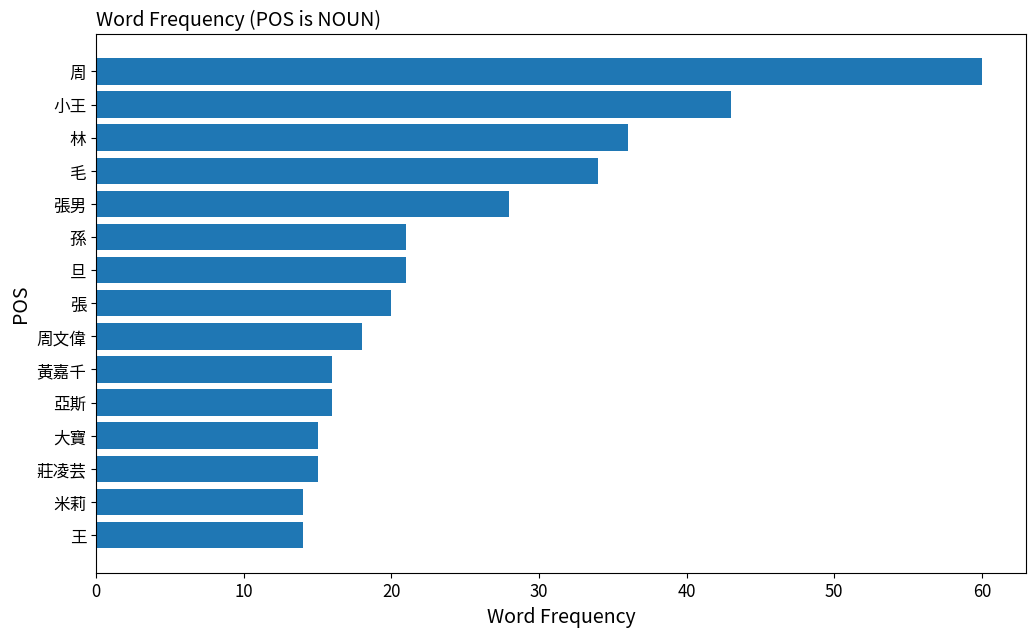

In [47]:
# 設定中文字形
word = noun_count['word']
count = noun_count['count']

fig, ax = plt.subplots(figsize =(12, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (POS is NOUN)',loc ='left', size = 14)
ax.set_ylabel('POS', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
fig.show()

姓氏和名字都是專有名詞

### 涉及到的動詞(VERB)

In [48]:
l_verb = ["VC"] # ,"VH","VA"
verb = pos_table[pos_table.pos.isin(l_verb)] # 選取特定詞性
verb = verb[verb['word'].map(len) > 1] # 把長度為1的字去除掉

verb_count = verb[['word']].groupby(['word'])['word'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(15)
verb_count

word  count
2650   溝通    808
2724   照顧    784
1845   接受    673
2264   改變    580
3504   處理    572
3615   解決    552
1215   幫忙    522
4182   選擇    495
4146   遇到    388
83     付出    365
4398   面對    349
4378   離開    291
1500   找到    289
2297   放棄    244
1878   控制    220

C:\Users\USER\AppData\Local\Temp\ipykernel_32896\29217454.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


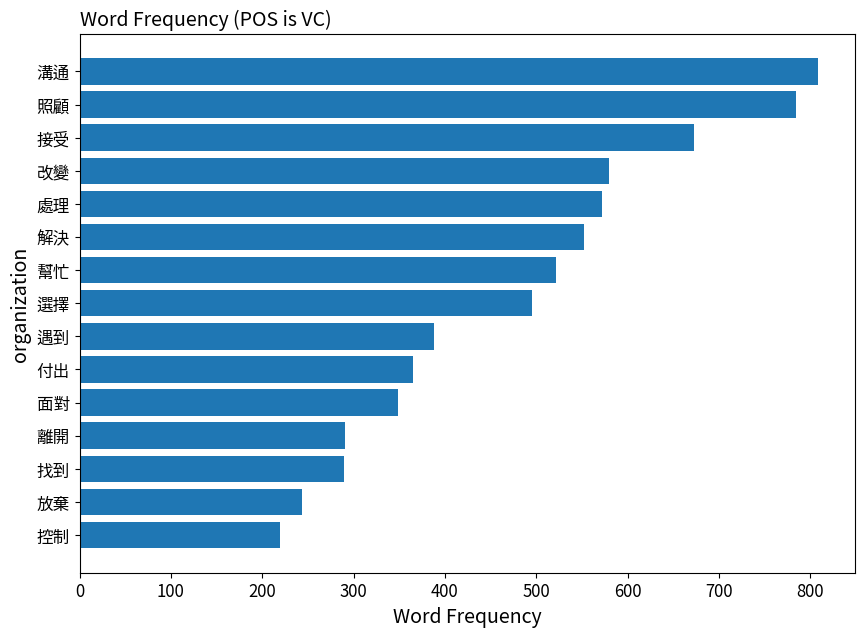

In [49]:
word = verb_count['word']
count = verb_count['count']

fig, ax = plt.subplots(figsize =(10, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (POS is VC)',loc ='left', size = 14)
ax.set_ylabel('organization', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
fig.show()

## 利用SnowNLP進行情緒分析
使用先前NER得到的「偷吃」相關文章，看看相關文章的情緒表現。<br>

In [51]:
from snownlp import SnowNLP
sentence_table =  pd.read_csv('text.csv')

sentiment_date = pd.merge(sentence_table,shu_selected[['system_id','artDate','dataSource']],on='system_id',how='left').dropna()
sentiment_date.head(3)

system_id                                             artUrl  \
0           1  https://www.ptt.cc/bbs/marriage/M.1610159827.A...   
6           7  https://www.ptt.cc/bbs/marriage/M.1610206202.A...   
19         20  https://www.ptt.cc/bbs/marriage/M.1610584018.A...   

                    artTitle            artDate_x   artPoster artCatagory  \
0            [求助]真的可以不給看手機嗎？  2021-01-09 10:37:05    safelove    marriage   
6               Re:[閒聊]離婚的掙扎  2021-01-09 23:30:01    aass5566    marriage   
19  Re:[求助]老婆說去上班實際是跟其他人去唱歌。  2021-01-14 08:26:51  season2011    marriage   

                                           artContent  \
0   常常看大家說，偷看手機是不對的，\n但如果已經結婚了，太太想看你手機，\n真的可以拒絕嗎？\...   
6   是不是陽明醫哥阿??\n\n  如果是的話 這個問題就好解決了\n如果是醫哥的話... 總之...   
19  有的人給的建議還不如原po自己的處置\n\n外遇都除罪化了\n抓到了也就賠30萬\n蒐集證據...   

                                           artComment             e_ip  \
0   [{"cmtStatus": "推", "cmtPoster": "FlyOncidium"...  114.137.169.105   
6   [{"cmtStatus": "噓", "cmtPoster": "ahtnamas", "...     36.237.62.32   
19  [{"cmtStatus": "推", "cmtPoster": "imreader", "...     114.46.1.133   

           insertedDate dataSource_x            artDate_y dataSource_y  
0   2021-01-10 01:20:56          ptt  2021-01-09 10:37:05          ptt  
6   2021-01-10 01:20:58          ptt  2021-01-09 23:30:01          ptt  
19  2021-01-15 01:09:08          ptt  2021-01-14 08:26:51          ptt

In [52]:
def get_sentiment(sent):
    s = SnowNLP(sent)
    return s.sentiments

# 幫每句話加上情緒分數
sentiment_date['sentimentValue'] = sentiment_date.apply(lambda row : get_sentiment(row['artContent'],), axis = 1)
sentiment_date.head(3)

system_id                                             artUrl  \
0           1  https://www.ptt.cc/bbs/marriage/M.1610159827.A...   
6           7  https://www.ptt.cc/bbs/marriage/M.1610206202.A...   
19         20  https://www.ptt.cc/bbs/marriage/M.1610584018.A...   

                    artTitle            artDate_x   artPoster artCatagory  \
0            [求助]真的可以不給看手機嗎？  2021-01-09 10:37:05    safelove    marriage   
6               Re:[閒聊]離婚的掙扎  2021-01-09 23:30:01    aass5566    marriage   
19  Re:[求助]老婆說去上班實際是跟其他人去唱歌。  2021-01-14 08:26:51  season2011    marriage   

                                           artContent  \
0   常常看大家說，偷看手機是不對的，\n但如果已經結婚了，太太想看你手機，\n真的可以拒絕嗎？\...   
6   是不是陽明醫哥阿??\n\n  如果是的話 這個問題就好解決了\n如果是醫哥的話... 總之...   
19  有的人給的建議還不如原po自己的處置\n\n外遇都除罪化了\n抓到了也就賠30萬\n蒐集證據...   

                                           artComment             e_ip  \
0   [{"cmtStatus": "推", "cmtPoster": "FlyOncidium"...  114.137.169.105   
6   [{"cmtStatus": "噓", "cmtPoster": "ahtnamas", "...     36.237.62.32   
19  [{"cmtStatus": "推", "cmtPoster": "imreader", "...     114.46.1.133   

           insertedDate dataSource_x            artDate_y dataSource_y  \
0   2021-01-10 01:20:56          ptt  2021-01-09 10:37:05          ptt   
6   2021-01-10 01:20:58          ptt  2021-01-09 23:30:01          ptt   
19  2021-01-15 01:09:08          ptt  2021-01-14 08:26:51          ptt   

    sentimentValue  
0     3.113065e-13  
6     2.238210e-13  
19    2.274737e-06

In [53]:
# 看一下情緒的分布
sentiment_date['sentimentValue'].describe()

count    3.080000e+02
mean     8.029415e-02
std      2.612223e-01
min      0.000000e+00
25%      0.000000e+00
50%      2.220446e-16
75%      7.357615e-08
max      1.000000e+00
Name: sentimentValue, dtype: float64

<Axes: >

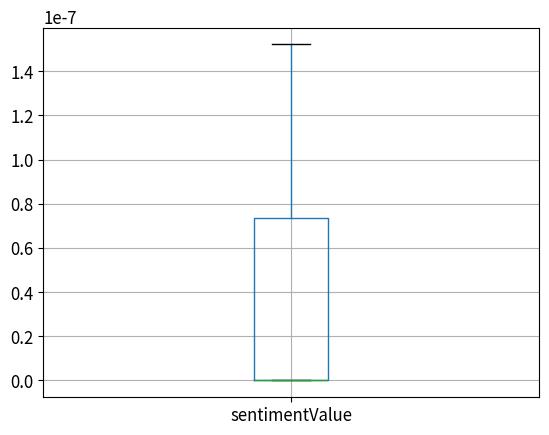

In [54]:
# 情緒分布的盒狀圖
boxplot = sentiment_date.boxplot(column=['sentimentValue'], showfliers=False)
boxplot

從上圖中發現大部分天數的情緒值都在0.6~0之間，偏向負面，推測是因為對象偷吃真的很難過

In [55]:
# 篩選掉只有單個字元的結果
filter_sentiment = sentiment_date.loc[sentiment_date['sentimentValue'] > 0.7]
filter_sentiment.head()
pos_words = pd.merge(filter_sentiment,pos_table,on='system_id',how='left')
pos_words = pos_words[['system_id','sentimentValue','word']]
pos_words.head()
pos_words = pos_words[pos_words.apply(lambda x: len(x['word'])>1, axis=1)]

### 正面詞彙文字雲

In [58]:
# 自定停用字
with open('stopwords.txt',encoding='utf-8') as f:
    stop_words = f.read().splitlines()

print(stop_words[:20])

['$', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '?', '_', '“', '”', '、', '。', '《', '》', '一']


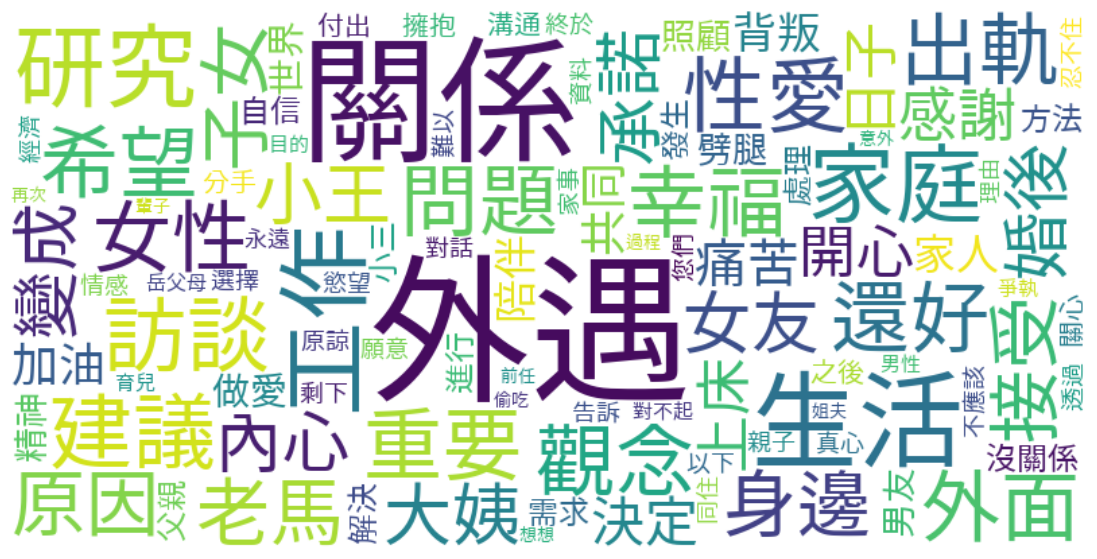

In [61]:
# 匯入自訂的 stop words (預設只有英文的)
stop_words_pos = stop_words
stop_words_pos.extend(('時間','營業','餐廳','覺得','真的','台灣','台北','高雄','有點','完全','飯店','會館','旭集','訂位','最多','相當','不錯','部分','最多','提供'))
stop_words_pos = set(stop_words_pos)

# 設定中文字形
font_path = 'font/TaipeiSansTCBeta-Regular.ttf'

# 可以設定字型大小和背景顏色
wordcloud = WordCloud(
                stopwords=stop_words_pos,
                collocations=False,
                font_path=font_path,
                width=800, 
                height = 400, 
                max_words=100, 
                background_color="white")

wordcloud.generate(' '.join(pos_words['word']))
# Display the generated image:
plt.figure(figsize = (14,7))
plt.imshow(wordcloud, interpolation="bilinear")

plt.axis("off")
plt.show()

### 負面情緒文字雲

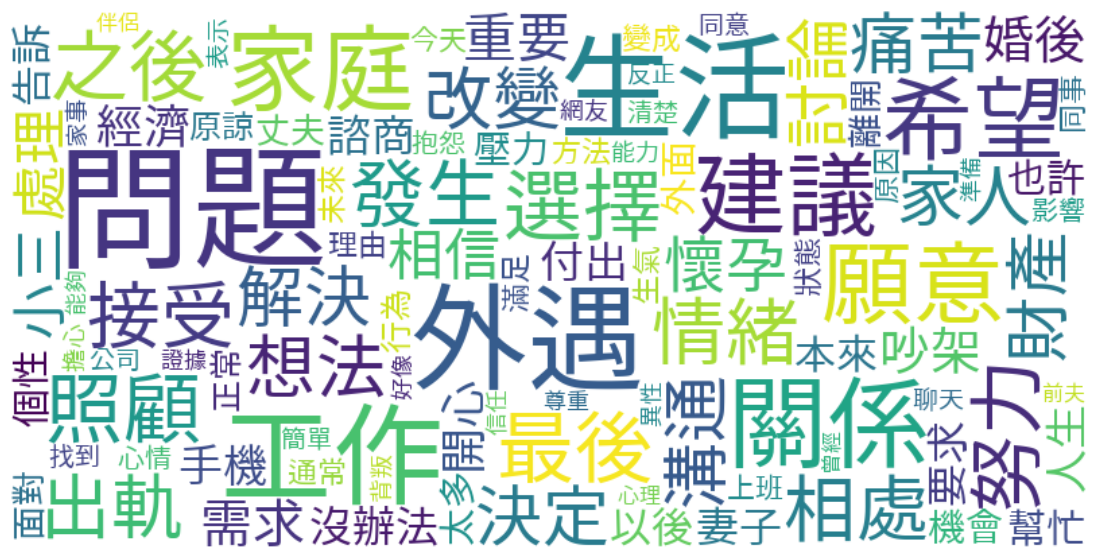

In [63]:

filter_sentiment = sentiment_date[(sentiment_date['sentimentValue'] < 0.4) ]
filter_sentiment.head()
pos_words = pd.merge(filter_sentiment,pos_table,on='system_id',how='left')
pos_words = pos_words[['system_id','sentimentValue','word']]
pos_words.head()
pos_words = pos_words[pos_words.apply(lambda x: len(x['word'])>1, axis=1)]

# 可以設定字型大小和背景顏色
wordcloud = WordCloud(
                stopwords=stop_words_pos,
                collocations=False,
                font_path=font_path,
                width=800, 
                height = 400, 
                max_words=100, 
                background_color="white")

wordcloud.generate(' '.join(pos_words['word']))
# Display the generated image:
plt.figure(figsize = (14,7))
plt.imshow(wordcloud, interpolation="bilinear")

plt.axis("off")
plt.show()

# 結論



本次分析主要針對 PTT 文章進行情緒分析，並結合 CKIP 斷詞與 SnowNLP 情緒分析工具，探討文章中的情緒變化與關鍵詞彙。以下是主要結論：

1. **情緒趨勢分析**：
    - 從情緒分數趨勢圖中可以看出，負面情緒的詞彙變化幅度明顯比正向詞彙大，顯示輿論、社會事件或新聞內容帶有較強的負面情緒。
    - 在特定時間區段（如 2021-07-15 至 2022-01-15），負面情緒分數較高，透過文字雲分析發現該段時間內出現了「問題」、「抱怨」等關鍵字。

2. **文章情緒分類**：
    - 透過情緒字典對文章進行分類，並計算每篇文章的情緒分數，發現負面文章在大多數時間都多於正向文章。
    - 進一步分析文章的情緒分數，發現大部分天數的情緒值都在 0.6 至 0 之間，偏向負面，推測是因為對象偷吃等事件引發的負面情緒。

3. **偷吃雲字雲分析**：
    - 在情緒高漲的時間區段，透過文字雲分析發現「偷吃」、「外遇」等關鍵字出現頻率較高，顯示偷吃事件對輿論產生了較大的影響。
    - 在負面情緒較高的時間區段，「生活」、「工作」等關鍵字也出現在文字雲中，顯示偷吃事件可能對生活、工作等方面產生了影響。


許多人在戀愛期間會刻意展現自己最好的一面，避免衝突，努力維持一段看似完美的關係。然而，結婚後，隨著生活步入日常，雙方的個性與價值觀才開始真正顯現。

婚後常見的衝突來源：

個性不合的現實化
戀愛時，雙方可能會包容對方的小缺點，但婚後的長期相處讓這些缺點放大。例如，一方喜歡安靜、另一方愛熱鬧，或是對時間、金錢管理的態度不同，這些問題逐漸成為摩擦的來源。

責任分工與期待落差
婚前可能沒有深入討論家務與財務分工，導致婚後一方覺得自己負擔過重。例如，妻子可能期待丈夫分擔家事，但丈夫認為傳統家庭應由女性主內，這種觀念差異容易導致爭執。

婆媳關係與育兒衝突
生小孩後，婆婆可能會以「過來人」的身份介入育兒方式，例如 insist 讓孩子使用傳統習俗餵養、不允許抱太久、或是過度干涉新手媽媽的育兒選擇。如果丈夫無法在母親與妻子之間取得平衡，容易讓妻子感到孤立無助。

親密感的變化
婚前的浪漫可能因為現實壓力而減少，例如照顧孩子、工作壓力導致雙方的互動變少，甚至因為生活瑣事而產生怨懟，影響夫妻感情。
最後相愛容易，相處難
```

# 我們遇到的困難

在進行專案時，我們一開始嘗試從 PTT 的 C_Chat 版和高雄版收集「吉伊卡哇」的相關資料，但總共只找到 333 筆。其中，高雄版的內容多為二手買賣資訊，缺乏實質討論，因此我們僅保留了 C_Chat 版的 183 筆資料。

接著，我們嘗試從 Dcard 的「吉伊卡哇」版抓取資料，但遇到被擋的問題。根據一些經驗分享，Dcard 可能會對大量請求進行限制，導致爬蟲被阻擋。

所以改選擇 PTT 婚姻版中關於「離婚」的討論作為資料集，成功收集到 2200 筆資料

且關於偷吃的關鍵字，因為沒有實際經驗很難產出。

**keyword_list = [**

    "外遇", "偷吃", "出軌", "偷腥", "劈腿", "紅杏出牆", "婚外情",
    "情婦", "小三", "小四", "小五", "情夫", "老王", "小白臉",
    "渣男", "渣女", "綠茶婊", "備胎", 
    "信任破裂", "背叛",
    "妨害家庭", "通姦"
]